# Data Imports

In [ ]:
!git clone https://github.com/ProjectCaffeine/ProjectHappinessData.git

Cloning into 'ProjectHappinessData'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (5/5), 12.11 KiB | 2.42 MiB/s, done.


# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

# Data Initialization

In [ ]:
happiness_df = pd.read_csv('./ProjectHappinessData/report_2018-2019.csv')

# Basic Data Info

In [ ]:
happiness_df.head()

,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,Afghanistan,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,145,Afghanistan,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036
2,107,Albania,2019,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,112,Albania,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032
4,88,Algeria,2019,5.211,1.002,1.160,0.785,0.086,0.073,0.114


In [ ]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  312 non-null    int64  
 1   Country or region             312 non-null    object 
 2   Year                          312 non-null    int64  
 3   Score                         312 non-null    float64
 4   GDP per capita                312 non-null    float64
 5   Social support                312 non-null    float64
 6   Healthy life expectancy       312 non-null    float64
 7   Freedom to make life choices  312 non-null    float64
 8   Generosity                    312 non-null    float64
 9   Perceptions of corruption     312 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 24.5+ KB


In [ ]:
happiness_df.describe()

,Overall rank,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,78.500000,2018.500000,5.391506,0.898298,1.211026,0.661295,0.423538,0.182926,0.111526
std,45.104737,0.500803,1.114631,0.394592,0.300310,0.252724,0.156024,0.096739,0.095296
min,1.000000,2018.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,2018.000000,4.514250,0.609500,1.055750,0.488250,0.322500,0.108750,0.050000
50%,78.500000,2018.500000,5.379500,0.960000,1.265500,0.699000,0.449500,0.175500,0.082000
75%,117.250000,2019.000000,6.176000,1.219500,1.457500,0.858000,0.540250,0.245000,0.141250
max,156.000000,2019.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.598000,0.457000


# Data Visualization

<Axes: xlabel='Overall rank', ylabel='Perceptions of corruption'>

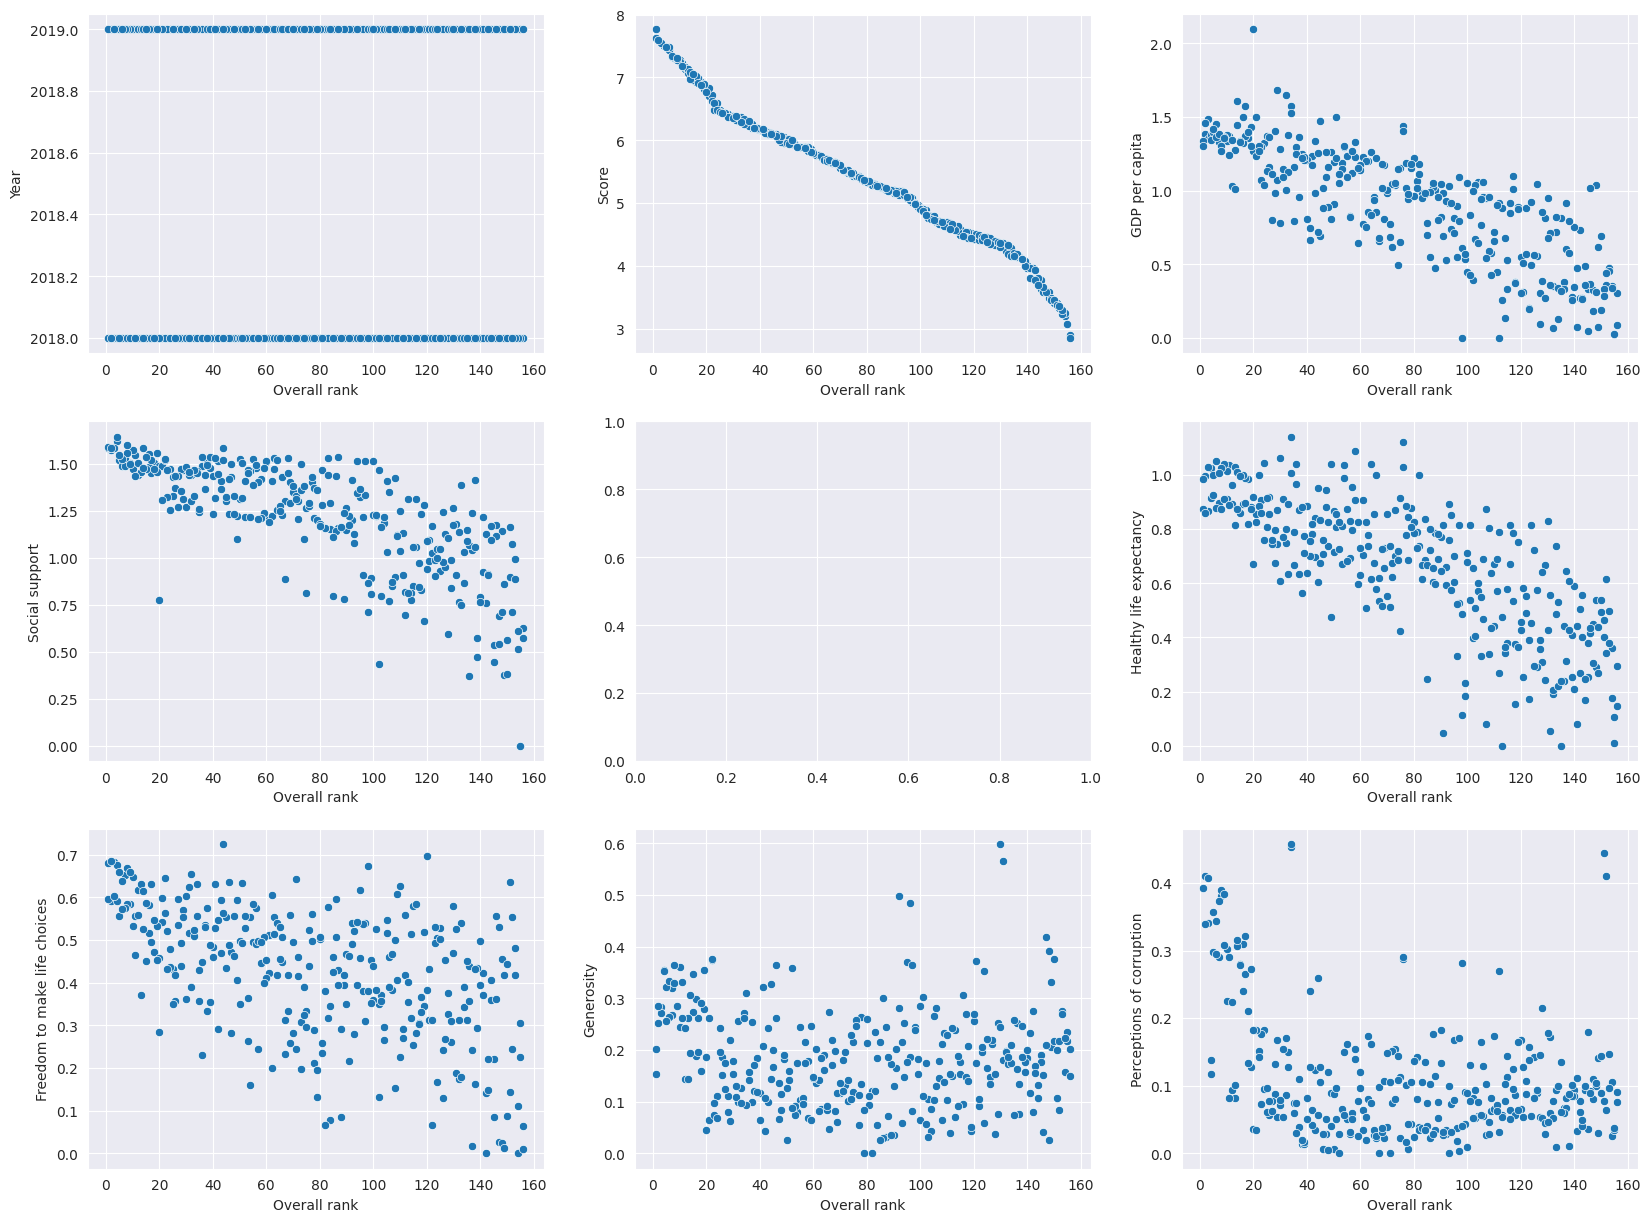

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

sns.scatterplot(x=happiness_df['Overall rank'], y=happiness_df['Year'], ax=axes[0][0])

sns.scatterplot(x=happiness_df['Overall rank'], y=happiness_df['Score'], ax=axes[0][1])

sns.scatterplot(x=happiness_df['Overall rank'], y=happiness_df['GDP per capita'], ax=axes[0][2])

sns.scatterplot(x=happiness_df['Overall rank'], y=happiness_df['Social support'], ax=axes[1][0])

sns.scatterplot(x=happiness_df['Overall rank'], y=happiness_df['Healthy life expectancy'], ax=axes[1][2])

sns.scatterplot(x=happiness_df['Overall rank'], y=happiness_df['Freedom to make life choices'], ax=axes[2][0])

sns.scatterplot(x=happiness_df['Overall rank'], y=happiness_df['Generosity'], ax=axes[2][1])

sns.scatterplot(x=happiness_df['Overall rank'], y=happiness_df['Perceptions of corruption'], ax=axes[2][2])

In [ ]:
happiness_df_copy = happiness_df.copy(deep=True)
happiness_df_copy["Score >= 5.379"] = happiness_df_copy["Score"].apply(lambda x: 1 if x >= 5.379 else 0)

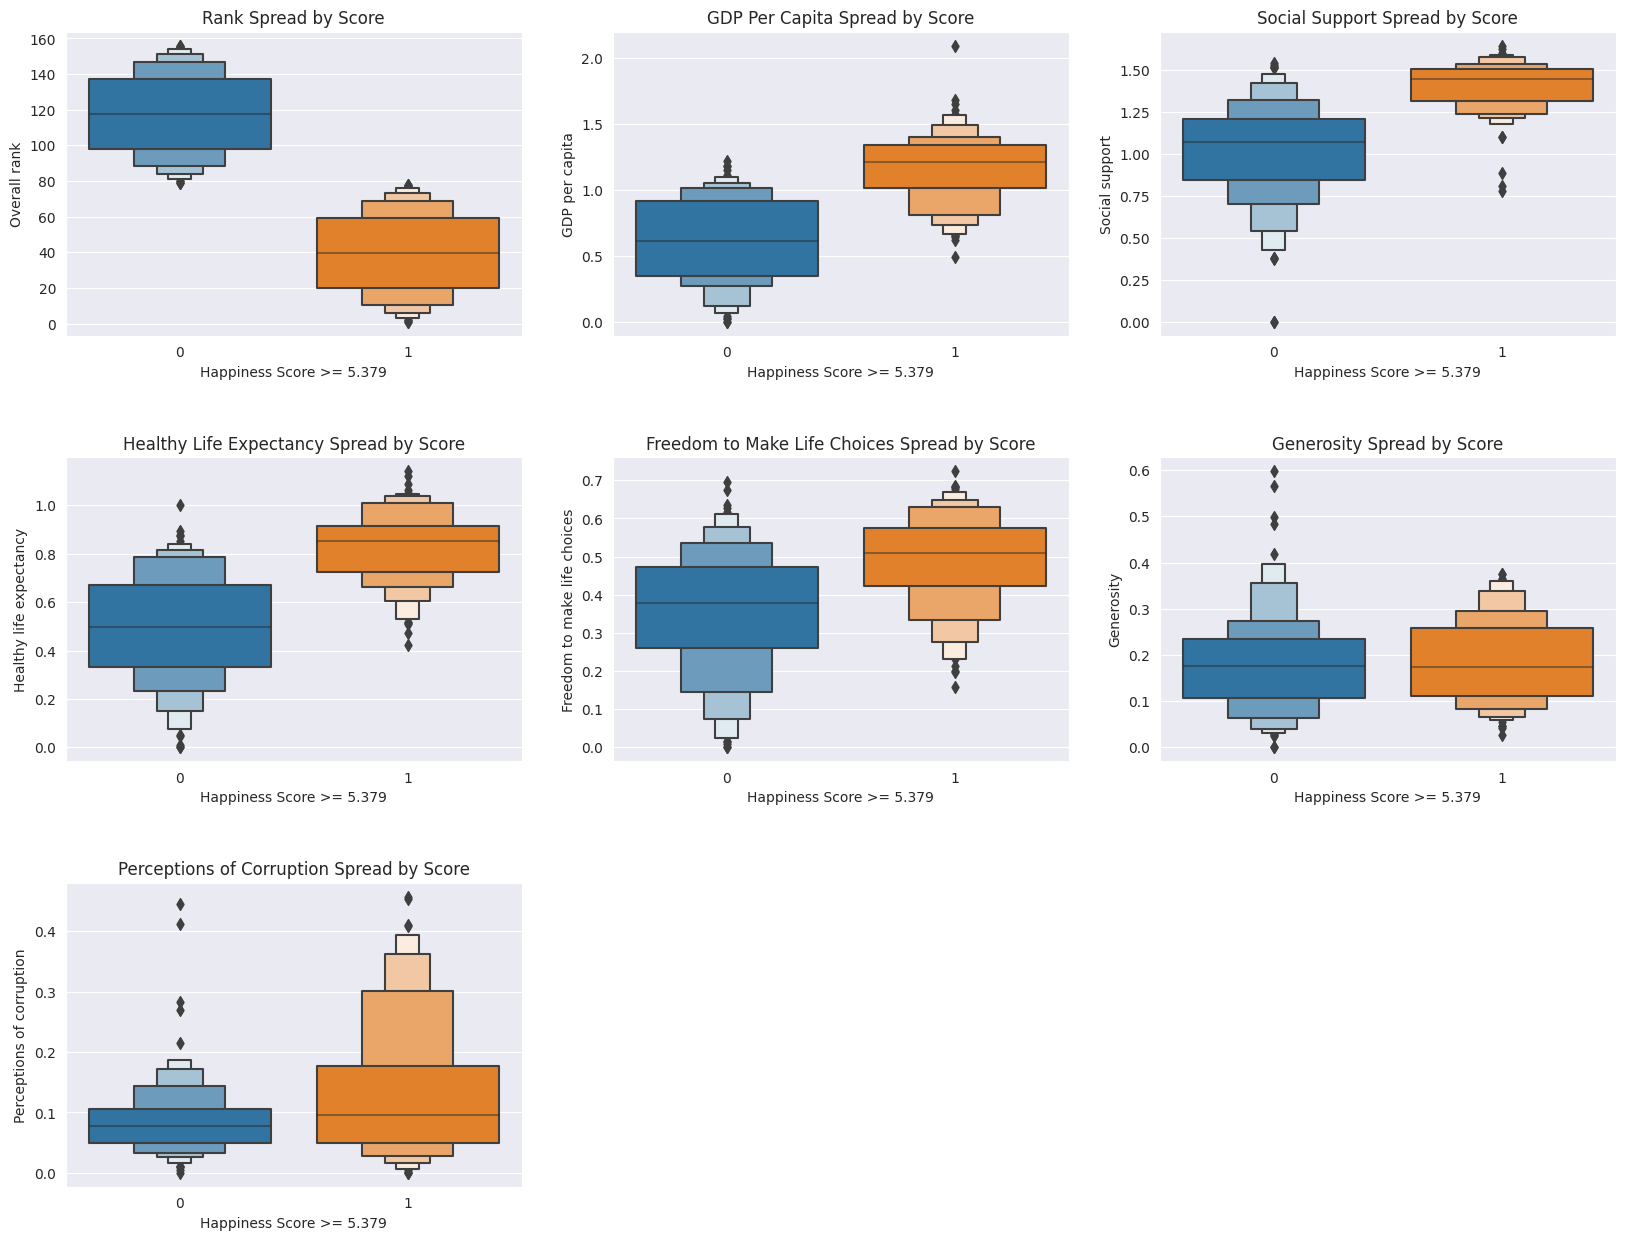

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
sns.boxenplot(x="Score >= 5.379",y="Overall rank", data=happiness_df_copy, ax = axes[0][0])
sns.boxenplot(x="Score >= 5.379",y="GDP per capita", data=happiness_df_copy, ax = axes[0][1])
sns.boxenplot(x="Score >= 5.379",y="Social support", data=happiness_df_copy, ax = axes[0][2])
sns.boxenplot(x="Score >= 5.379",y="Healthy life expectancy", data=happiness_df_copy, ax = axes[1][0])
sns.boxenplot(x="Score >= 5.379",y="Freedom to make life choices", data=happiness_df_copy, ax = axes[1][1])
sns.boxenplot(x="Score >= 5.379",y="Generosity", data=happiness_df_copy, ax = axes[1][2])
sns.boxenplot(x="Score >= 5.379",y="Perceptions of corruption", data=happiness_df_copy, ax = axes[2][0])
fig.delaxes(axes[2][1])
fig.delaxes(axes[2][2])
plt.subplots_adjust(wspace=0.2, hspace=0.4)
axes[0][0].set_xlabel('Happiness Score >= 5.379')
axes[0][1].set_xlabel('Happiness Score >= 5.379')
axes[0][2].set_xlabel('Happiness Score >= 5.379')
axes[1][0].set_xlabel('Happiness Score >= 5.379')
axes[1][1].set_xlabel('Happiness Score >= 5.379')
axes[1][2].set_xlabel('Happiness Score >= 5.379')
axes[2][0].set_xlabel('Happiness Score >= 5.379')
axes[0][0].set_title('Rank Spread by Score')
axes[0][1].set_title('GDP Per Capita Spread by Score')
axes[0][2].set_title('Social Support Spread by Score')
axes[1][0].set_title('Healthy Life Expectancy Spread by Score')
axes[1][1].set_title('Freedom to Make Life Choices Spread by Score')
axes[1][2].set_title('Generosity Spread by Score')
axes[2][0].set_title('Perceptions of Corruption Spread by Score')
plt.show()

<ipython-input-12-ac240fe7cad4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(happiness_df.corr(), annot=True)


<Axes: >

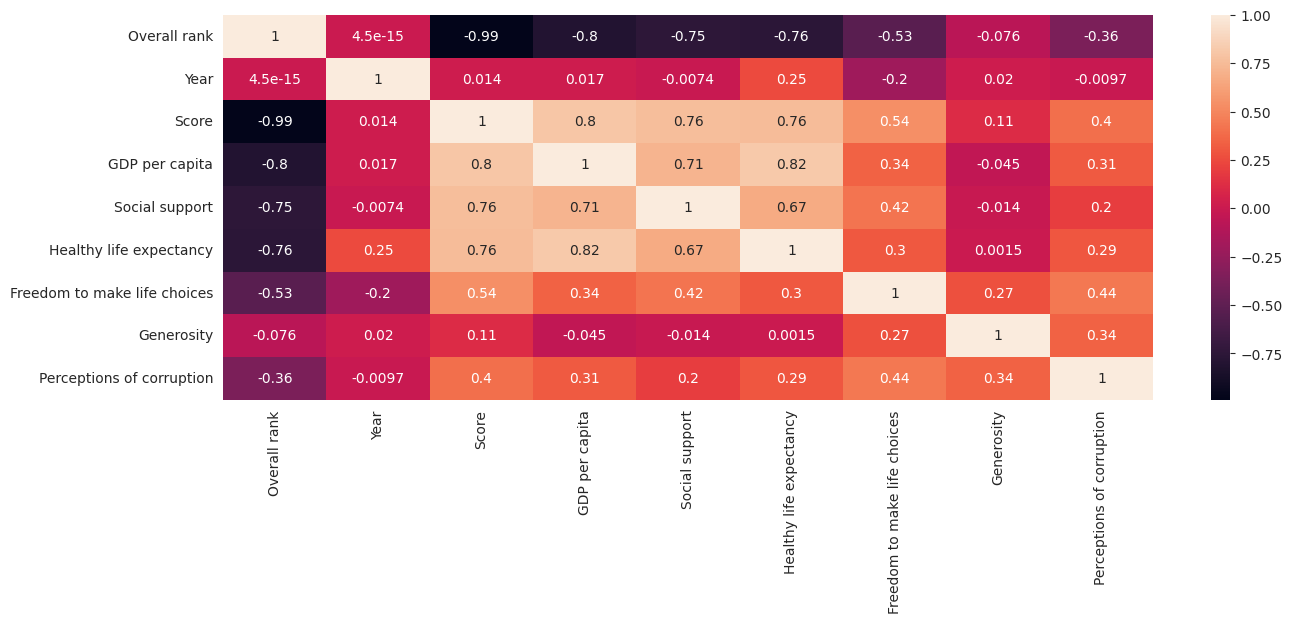

In [ ]:
sns.heatmap(happiness_df.corr(), annot=True)

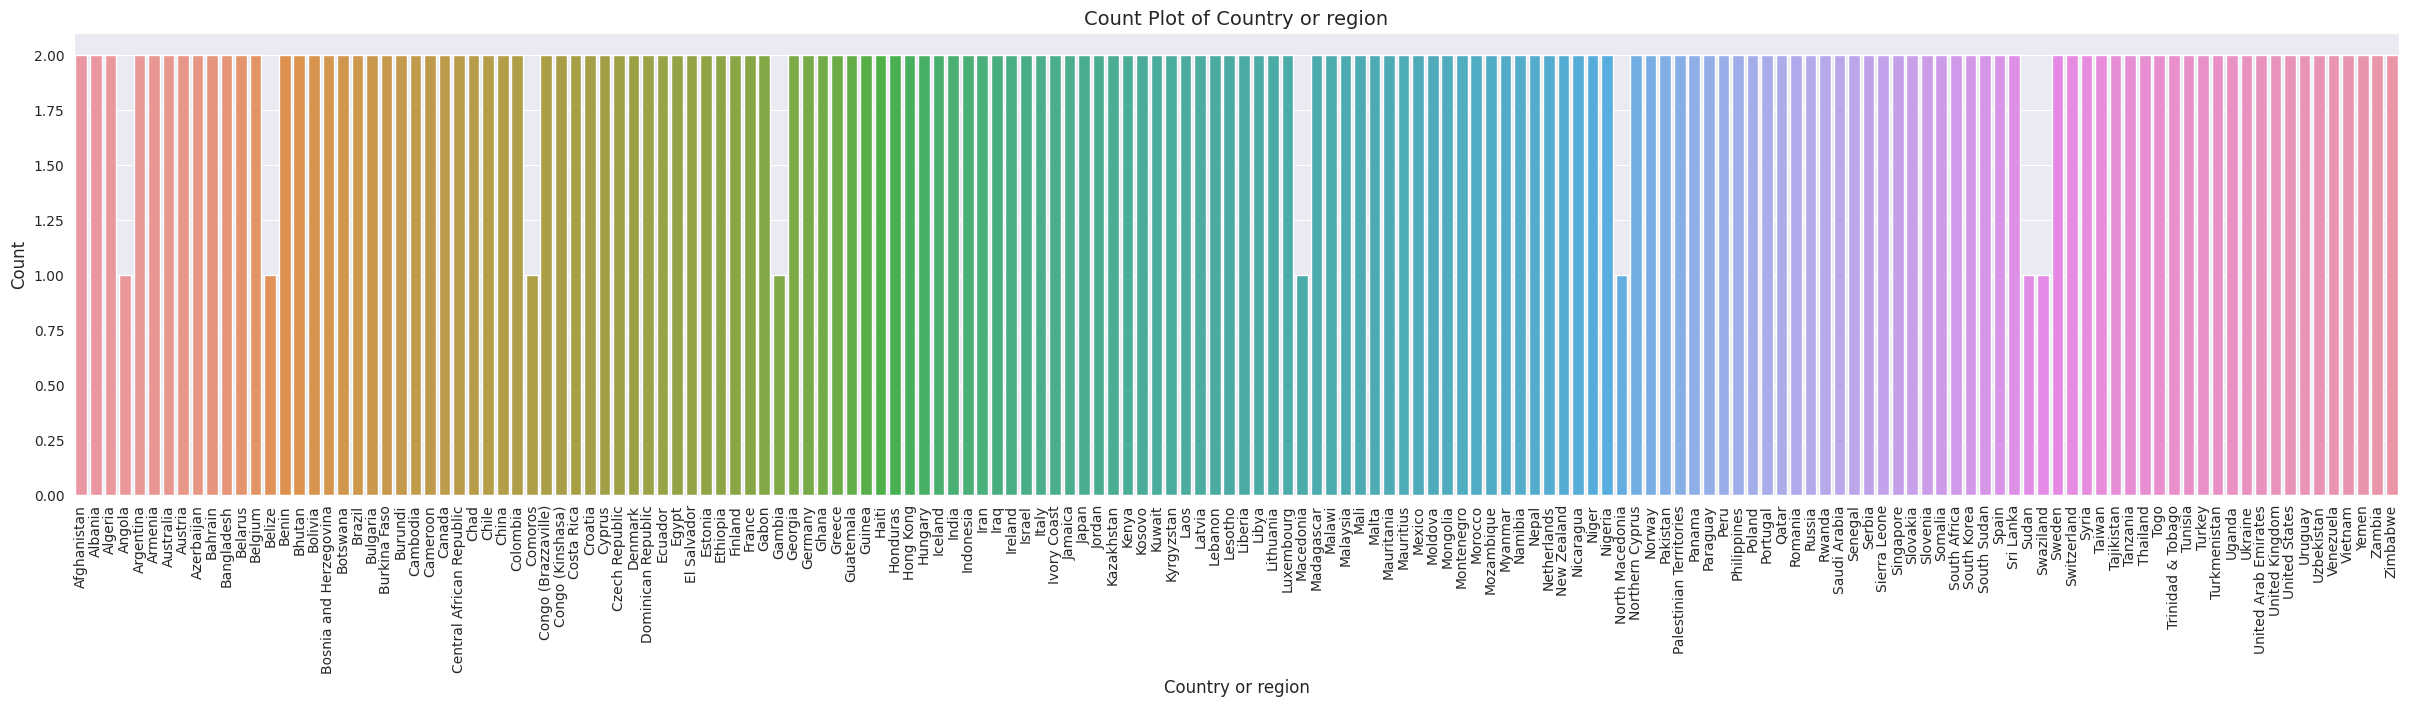

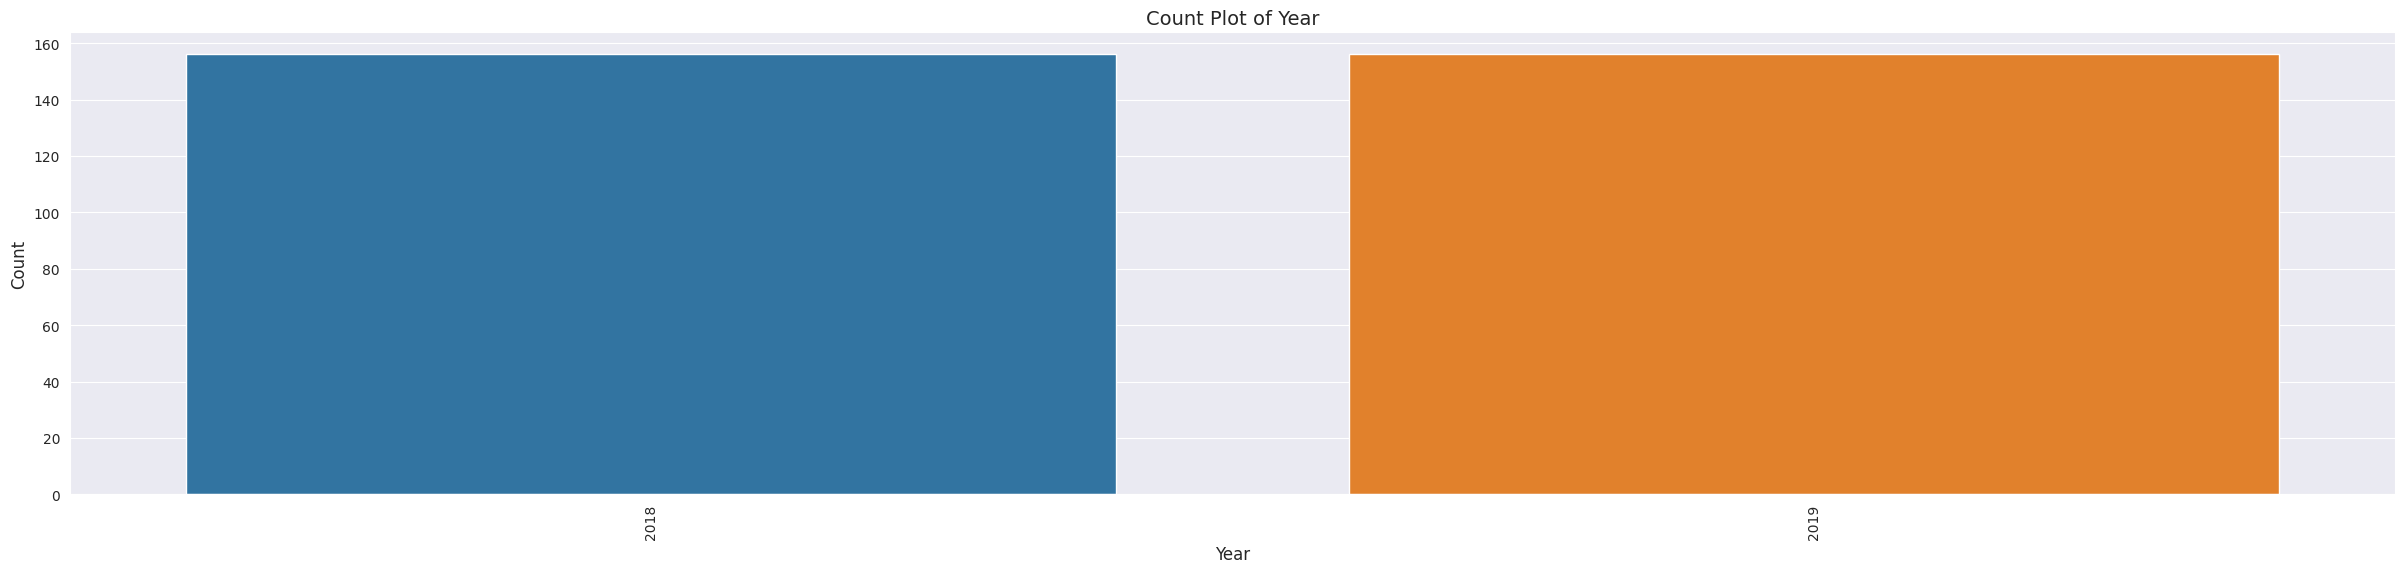

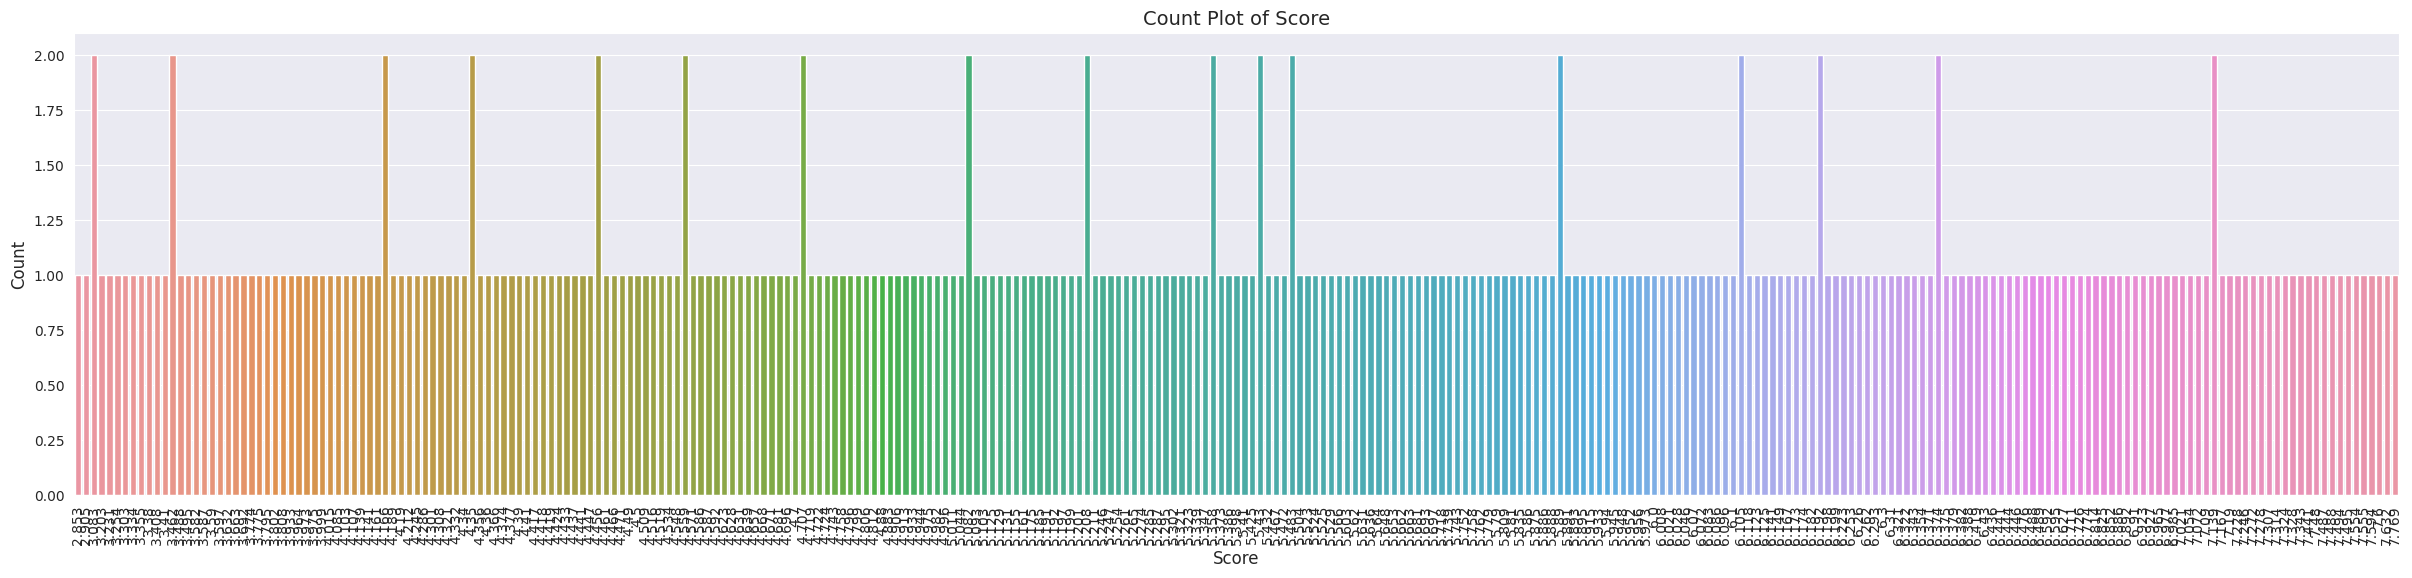

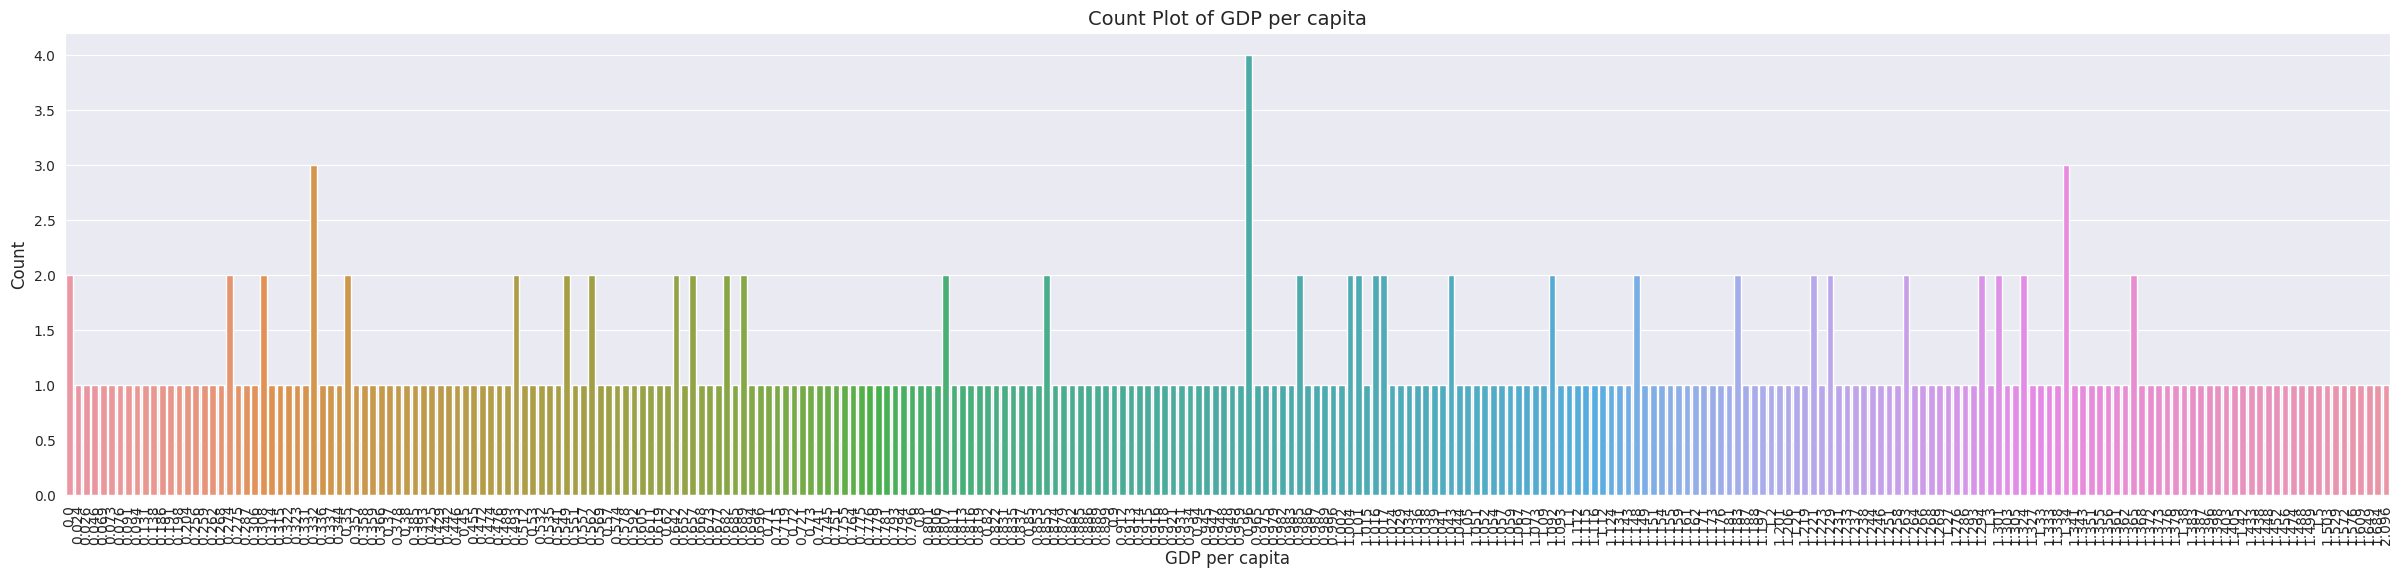

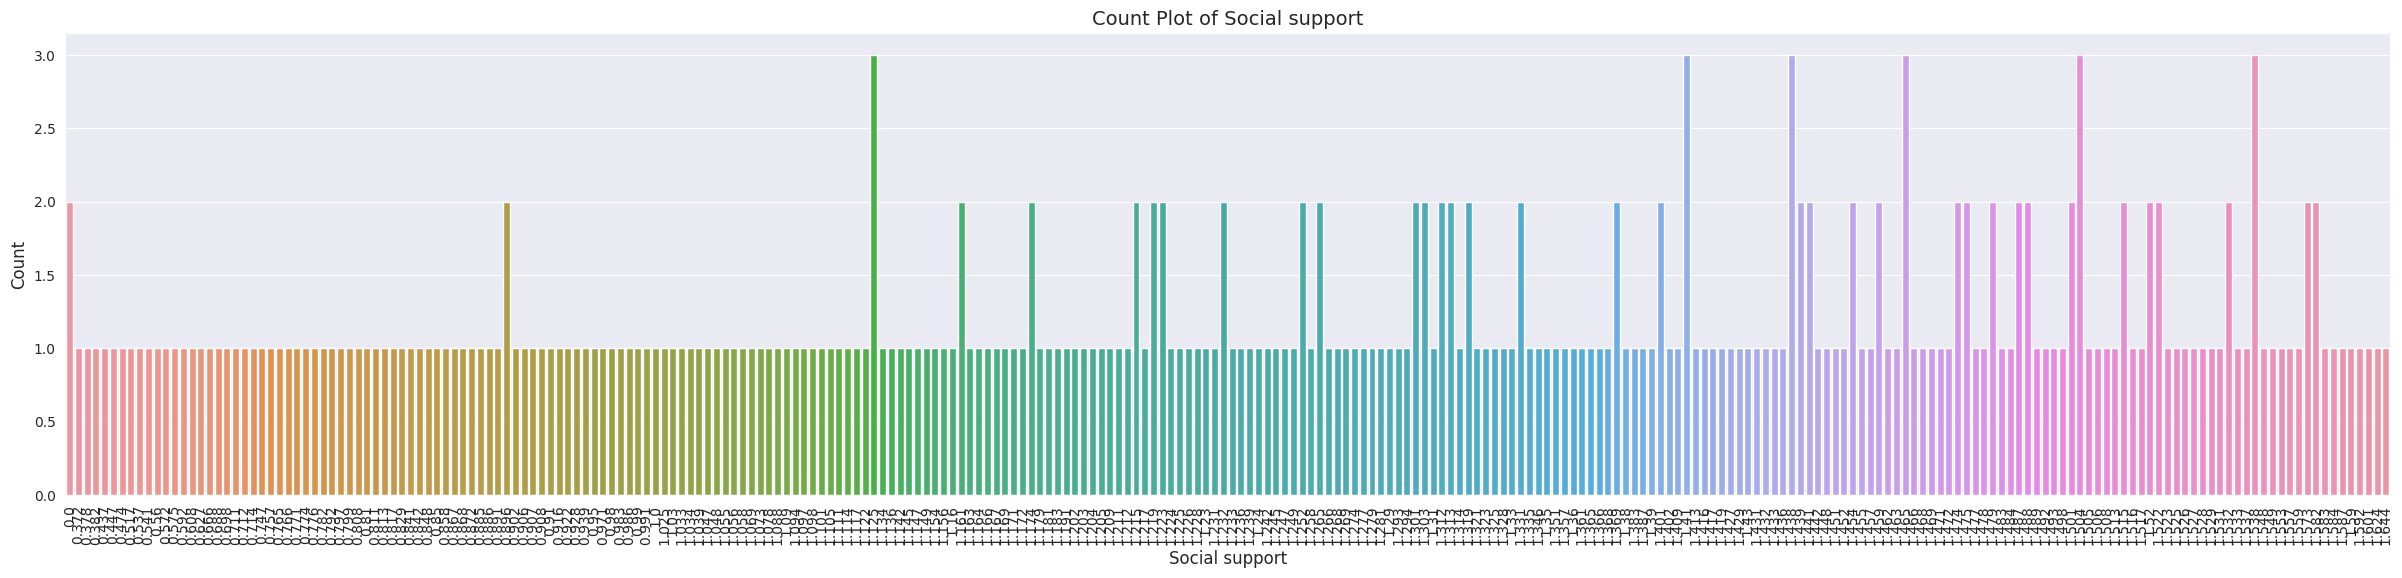

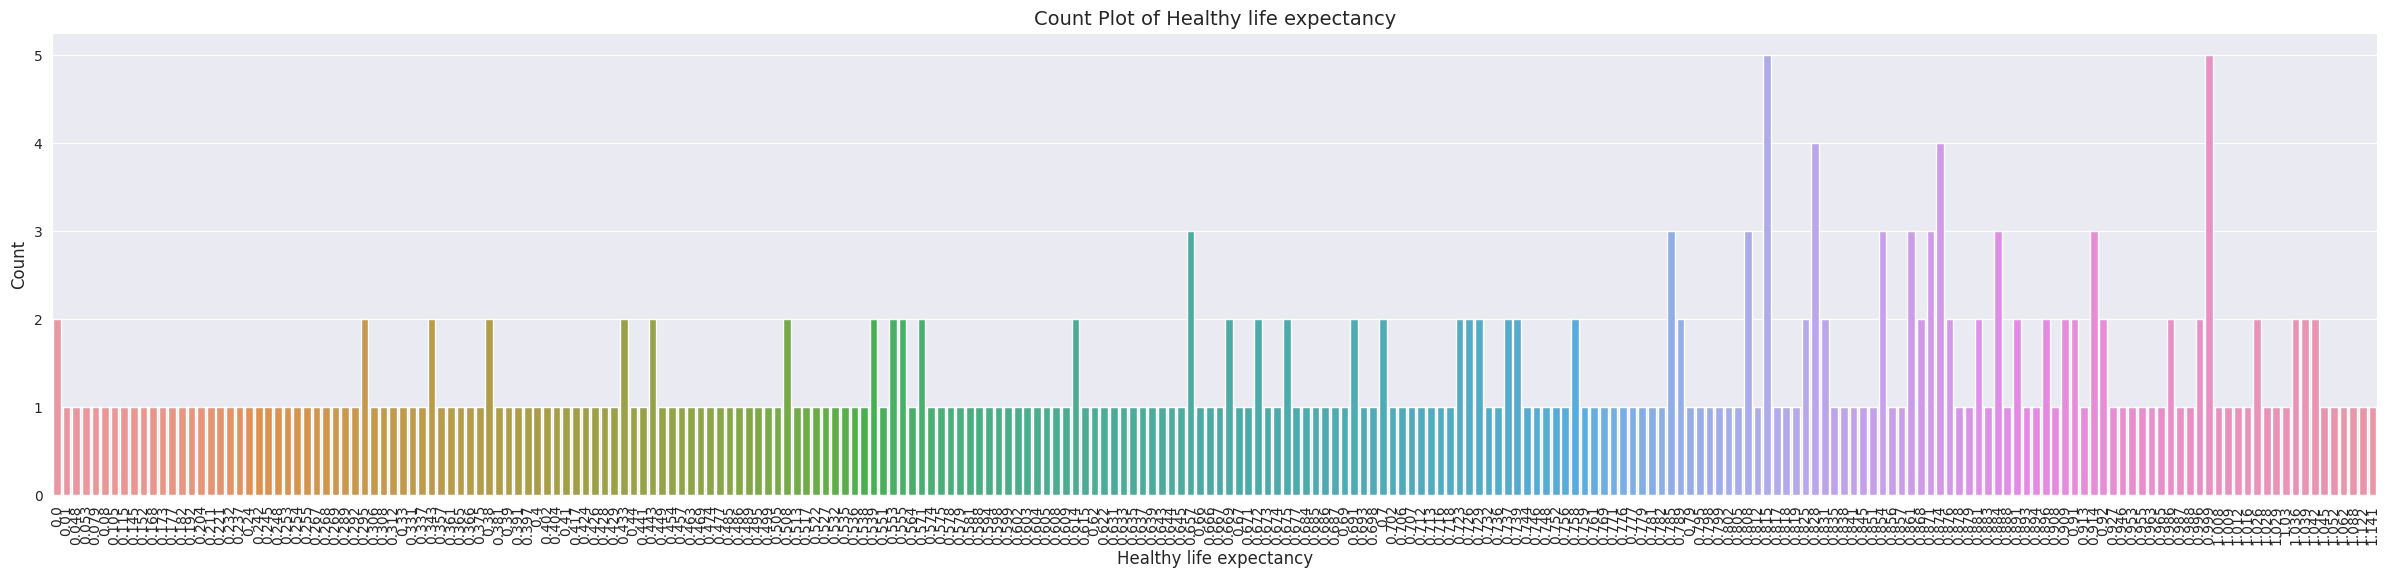

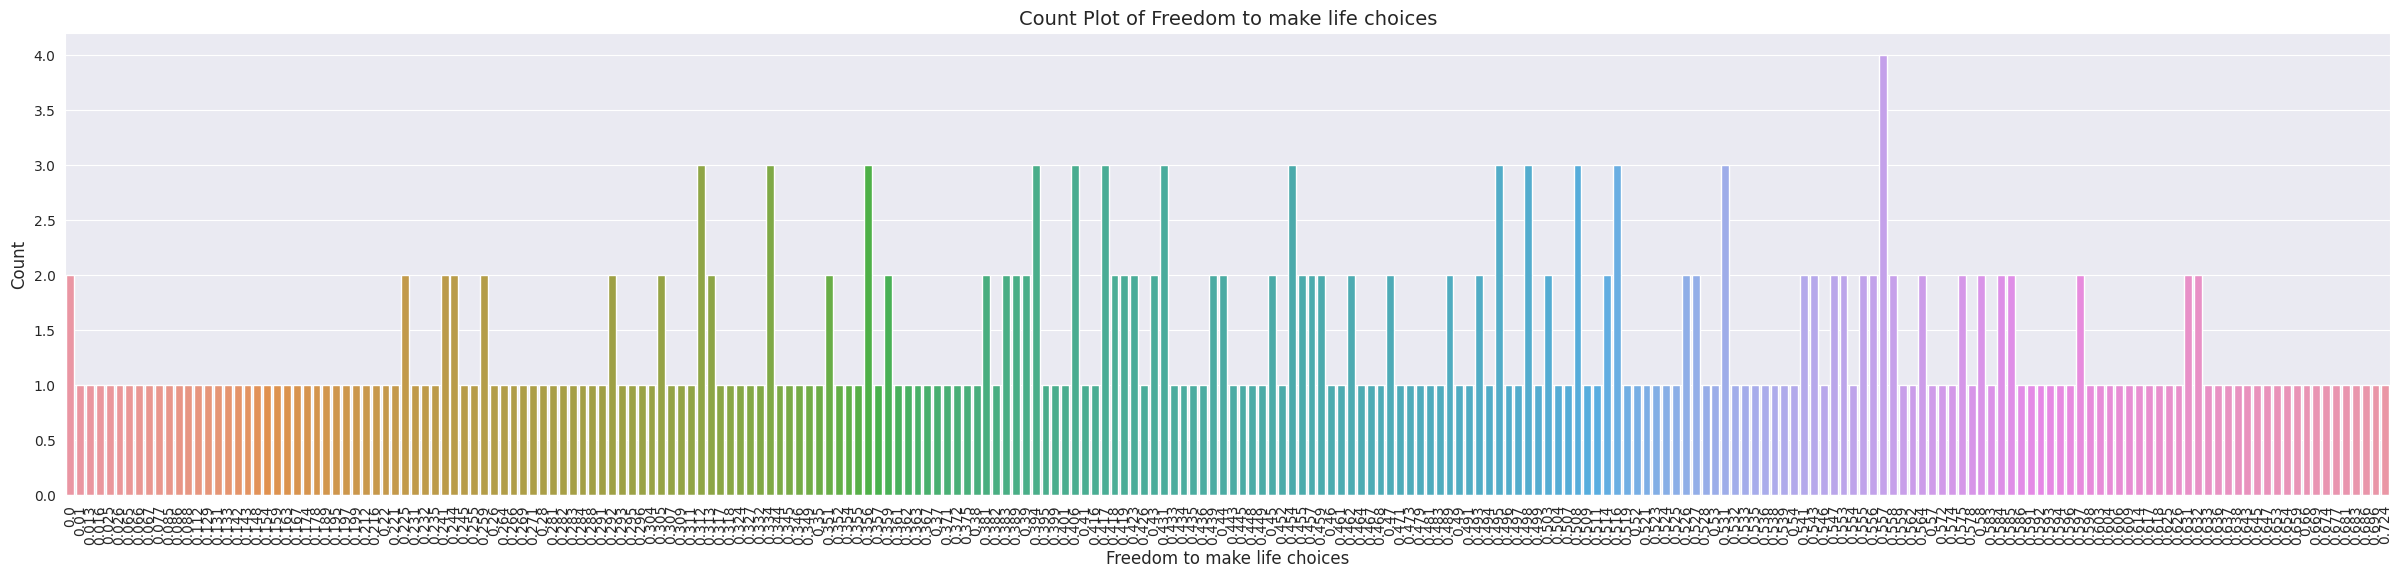

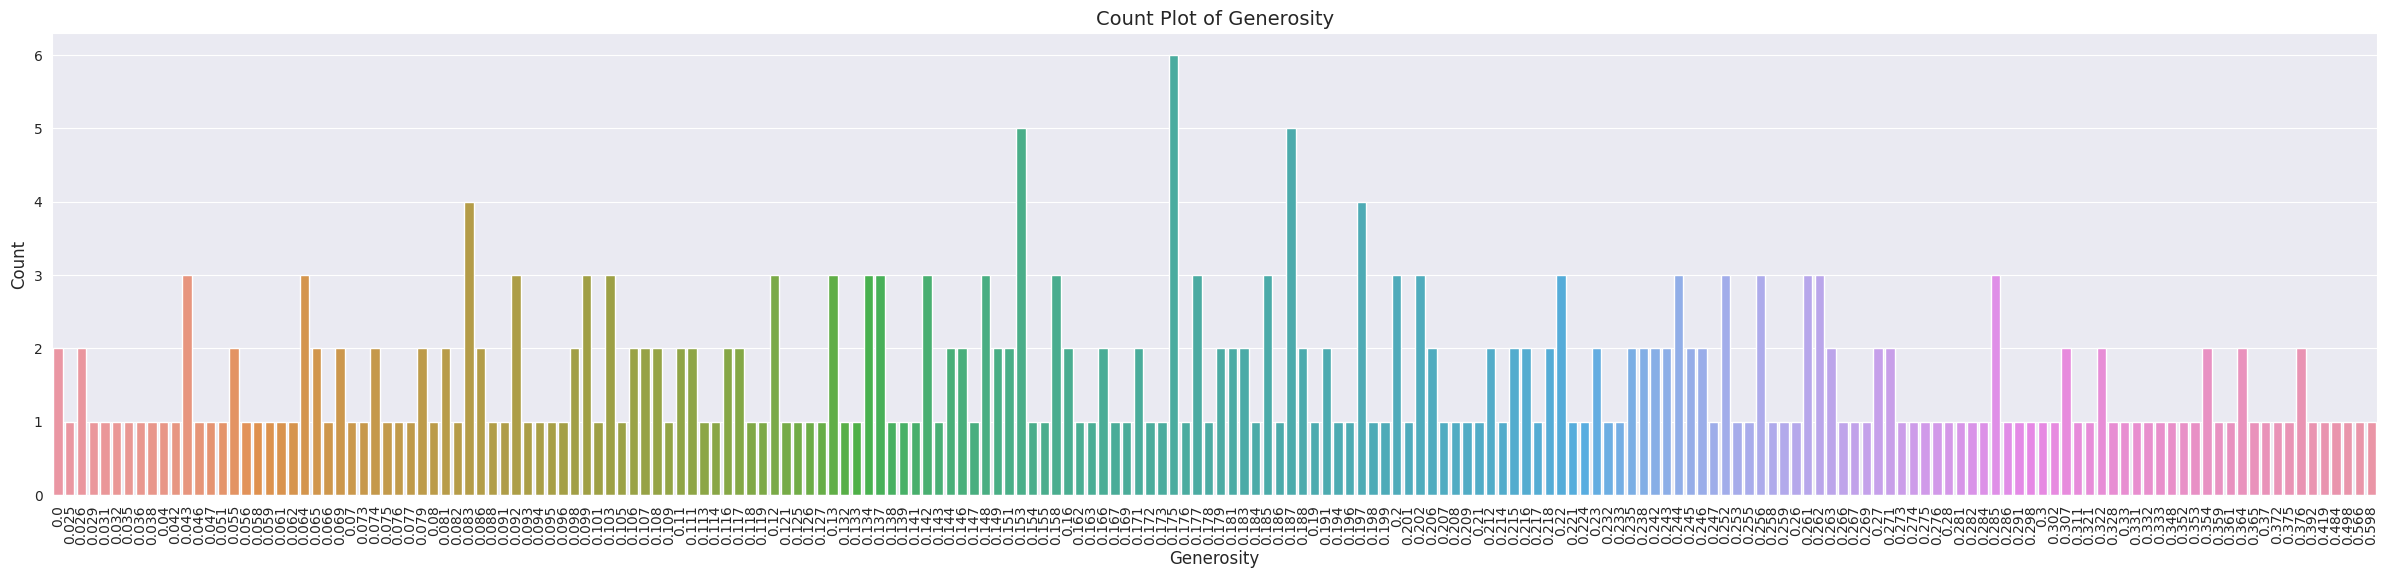

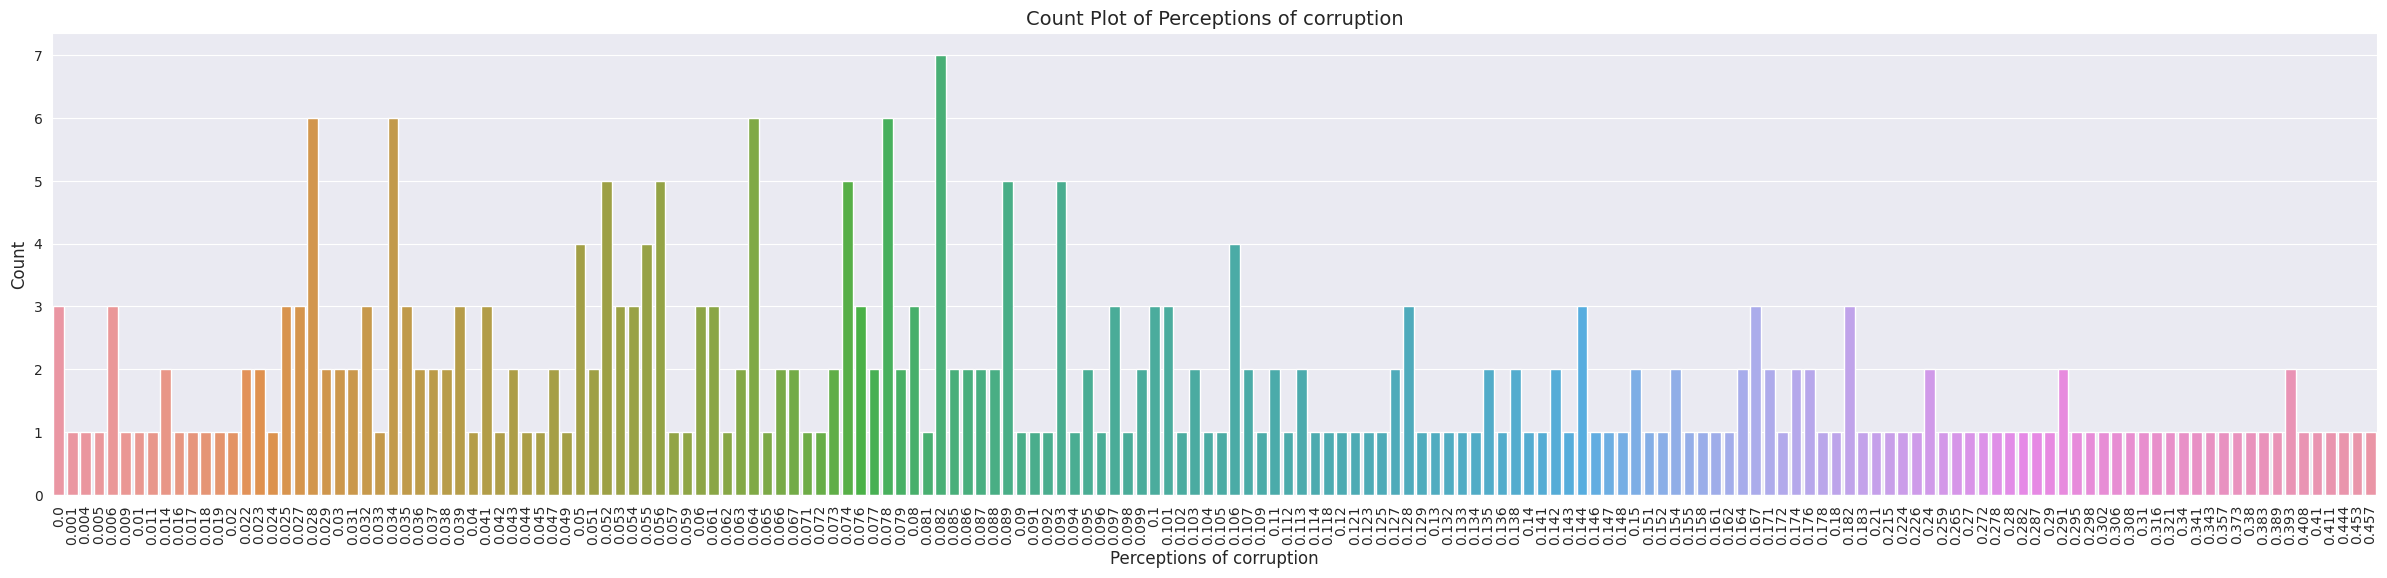

In [ ]:
#Copy of the dataset
happiness_df_copy_count = happiness_df.copy(deep=True)

# Dropping the 'Overall rank' column
happiness_df_drop = happiness_df_copy_count.drop('Overall rank', axis=1)

# Generating count plots for each column
for column in happiness_df_drop.columns:
    plt.figure(figsize=(30, 6))
    sns.countplot(x=happiness_df_drop[column])
    plt.title(f'Count Plot of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

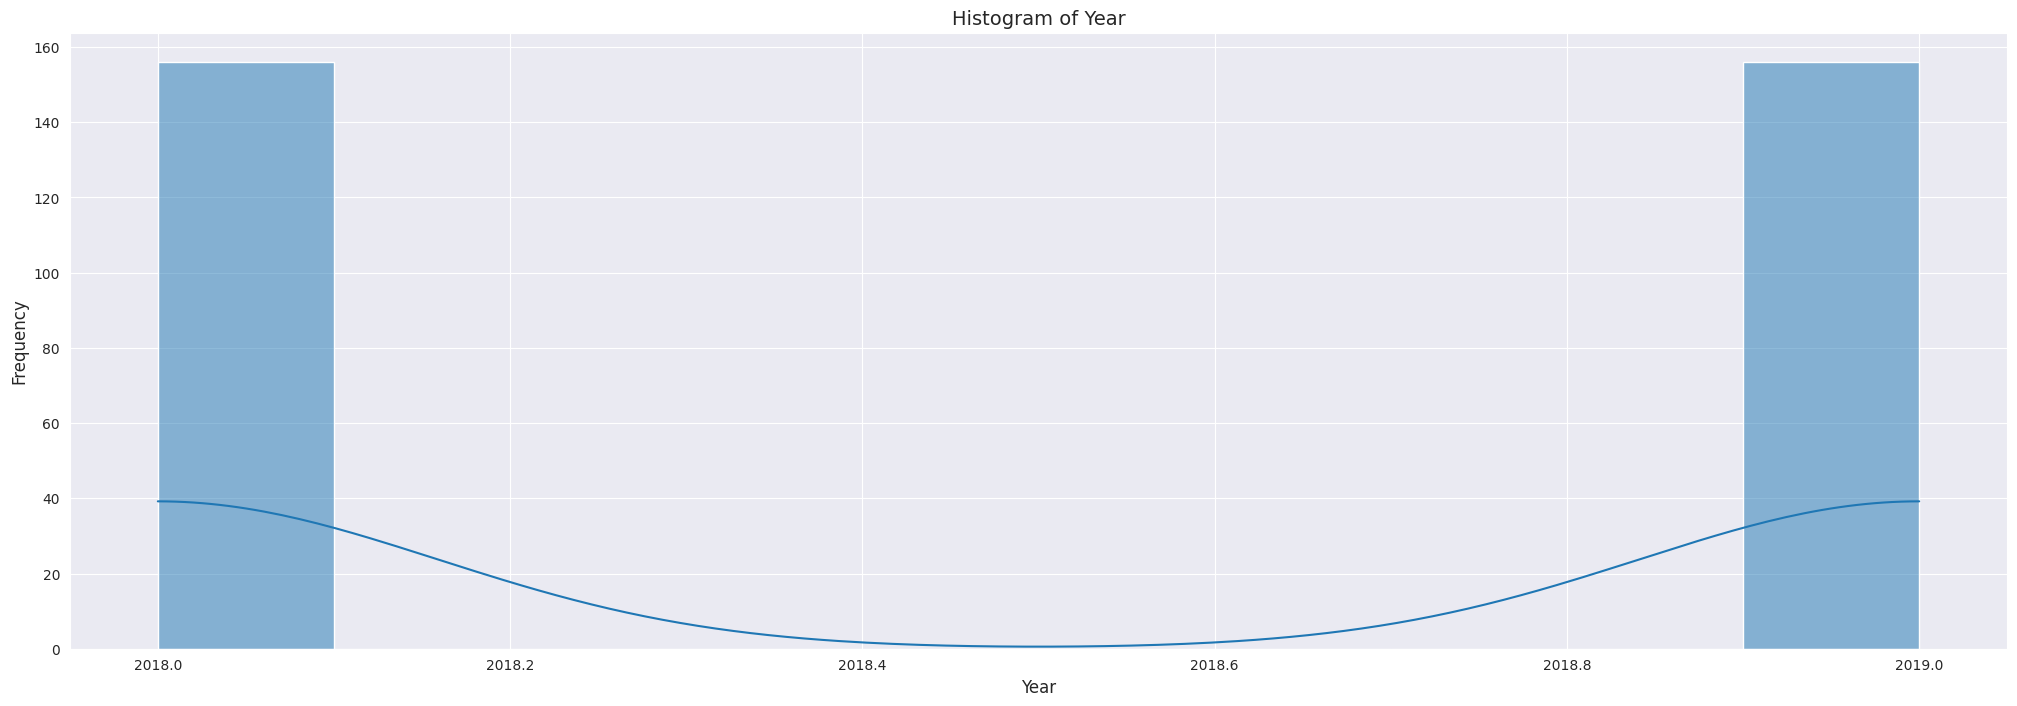

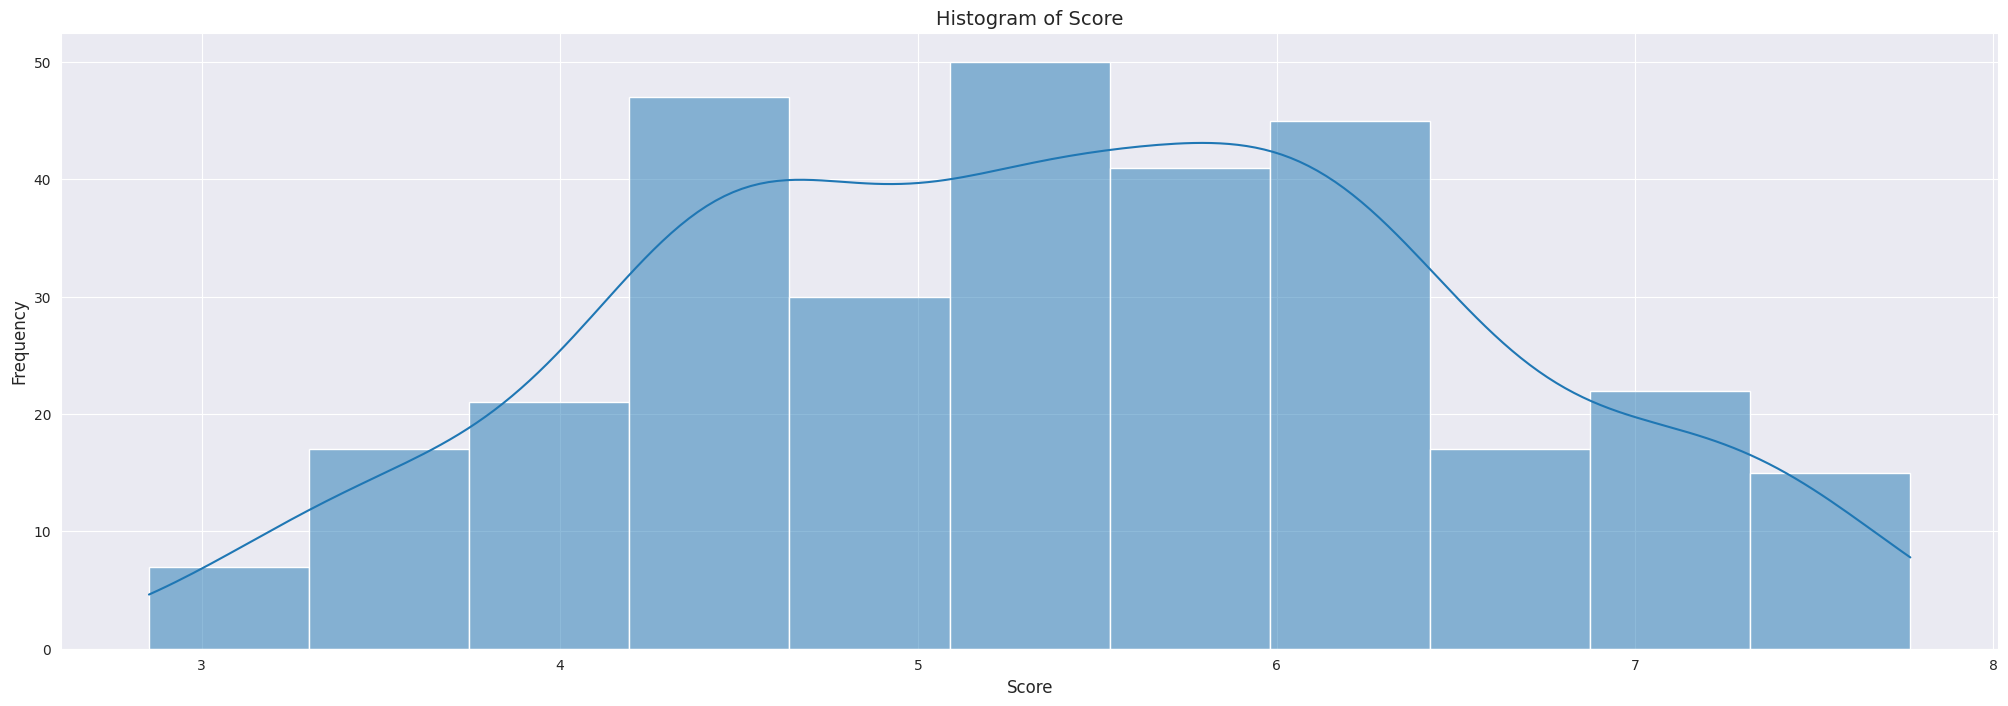

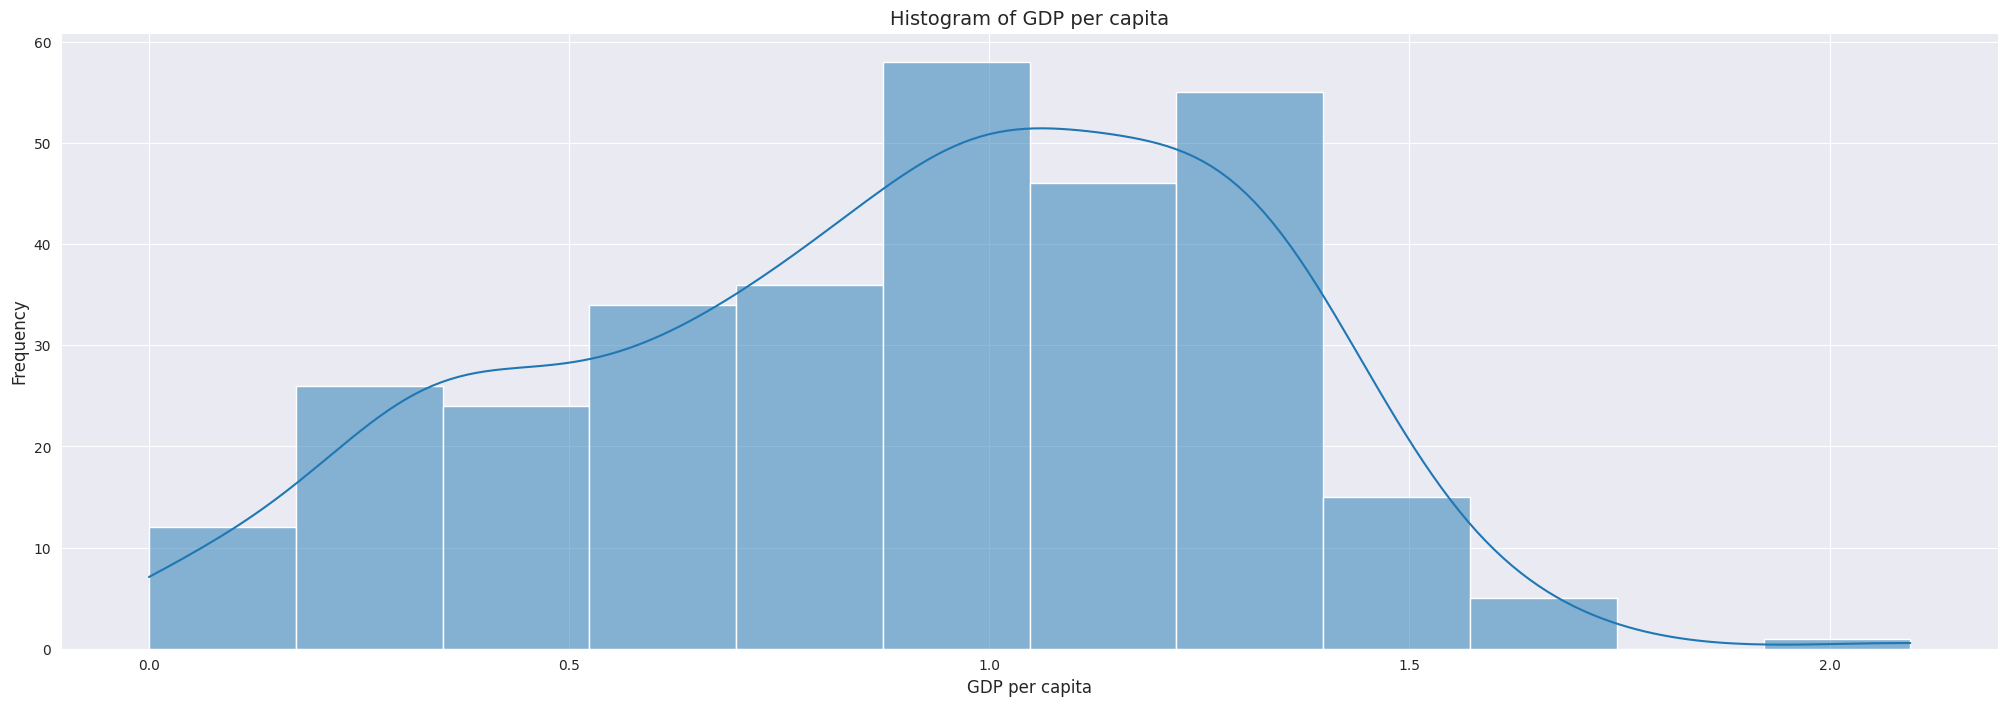

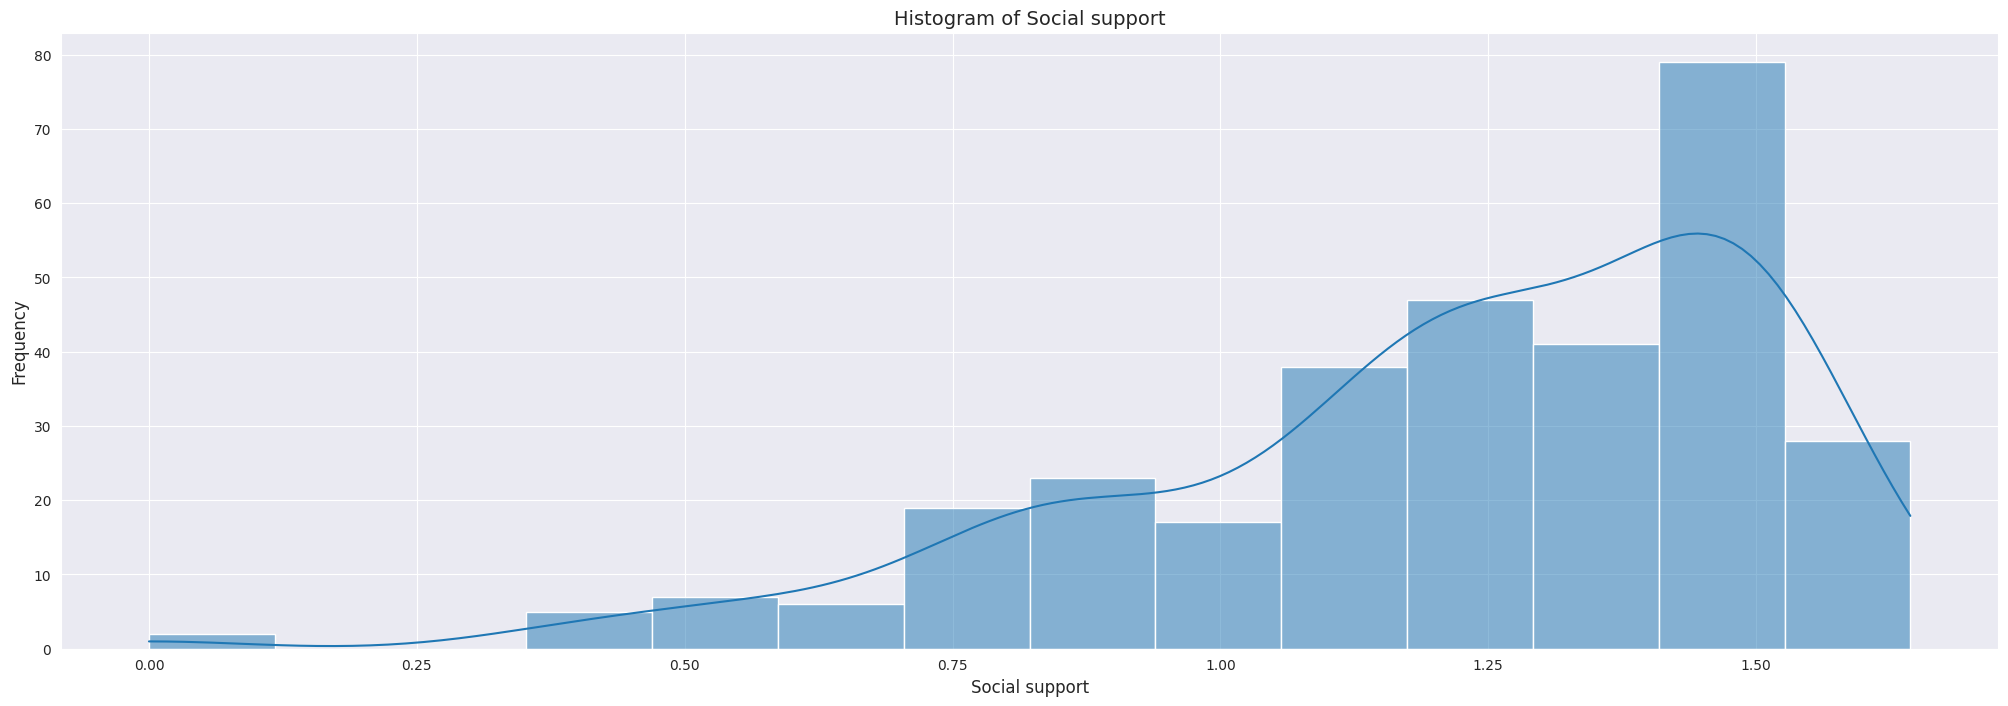

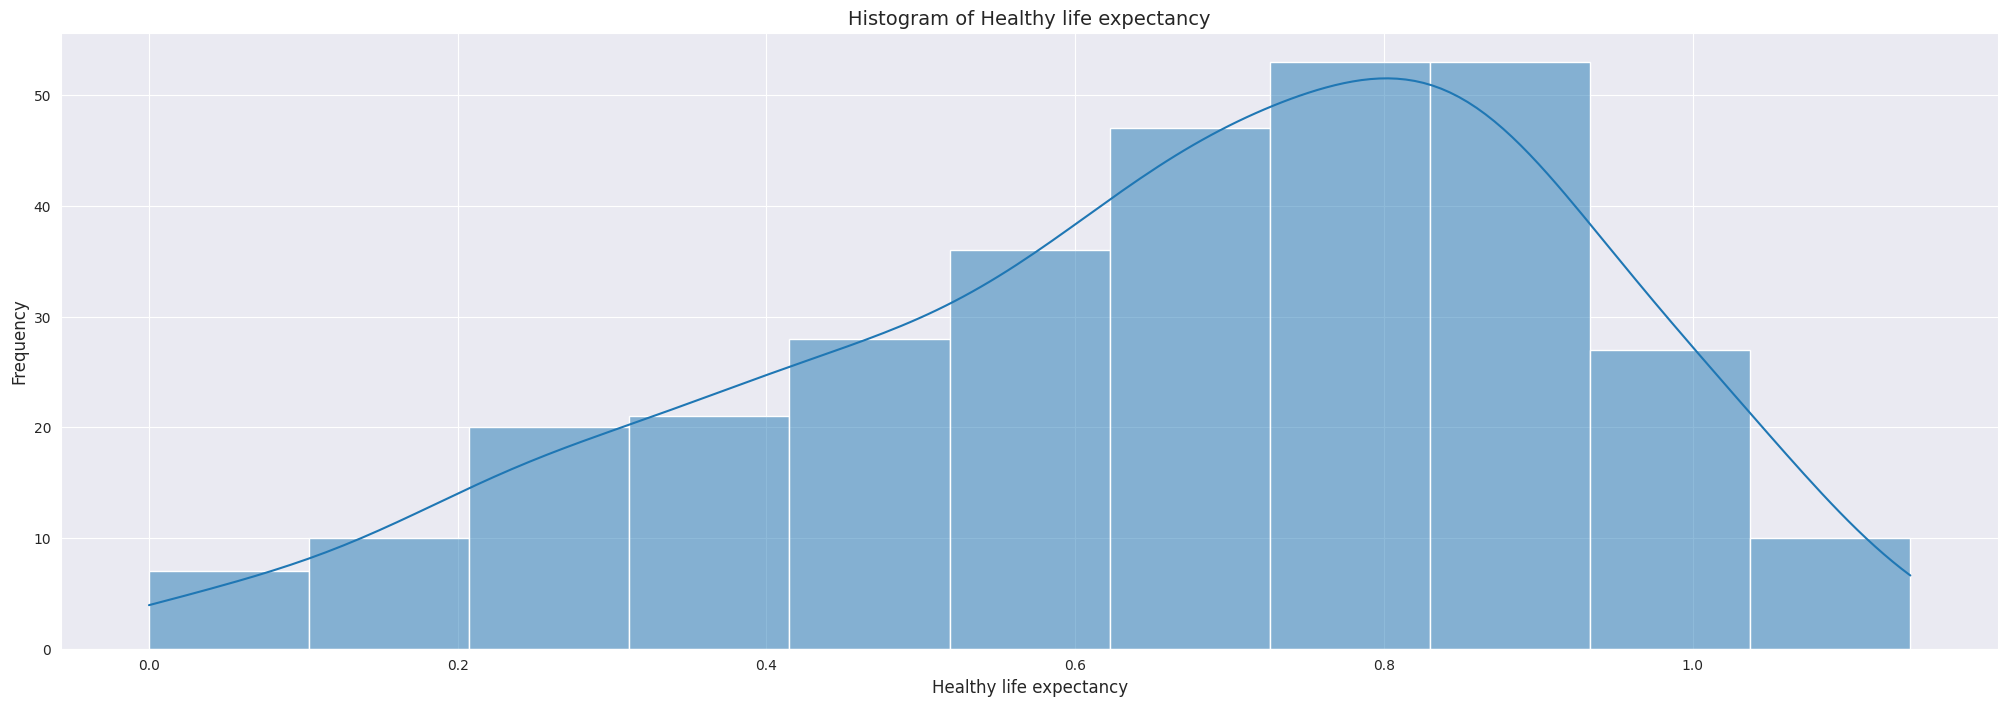

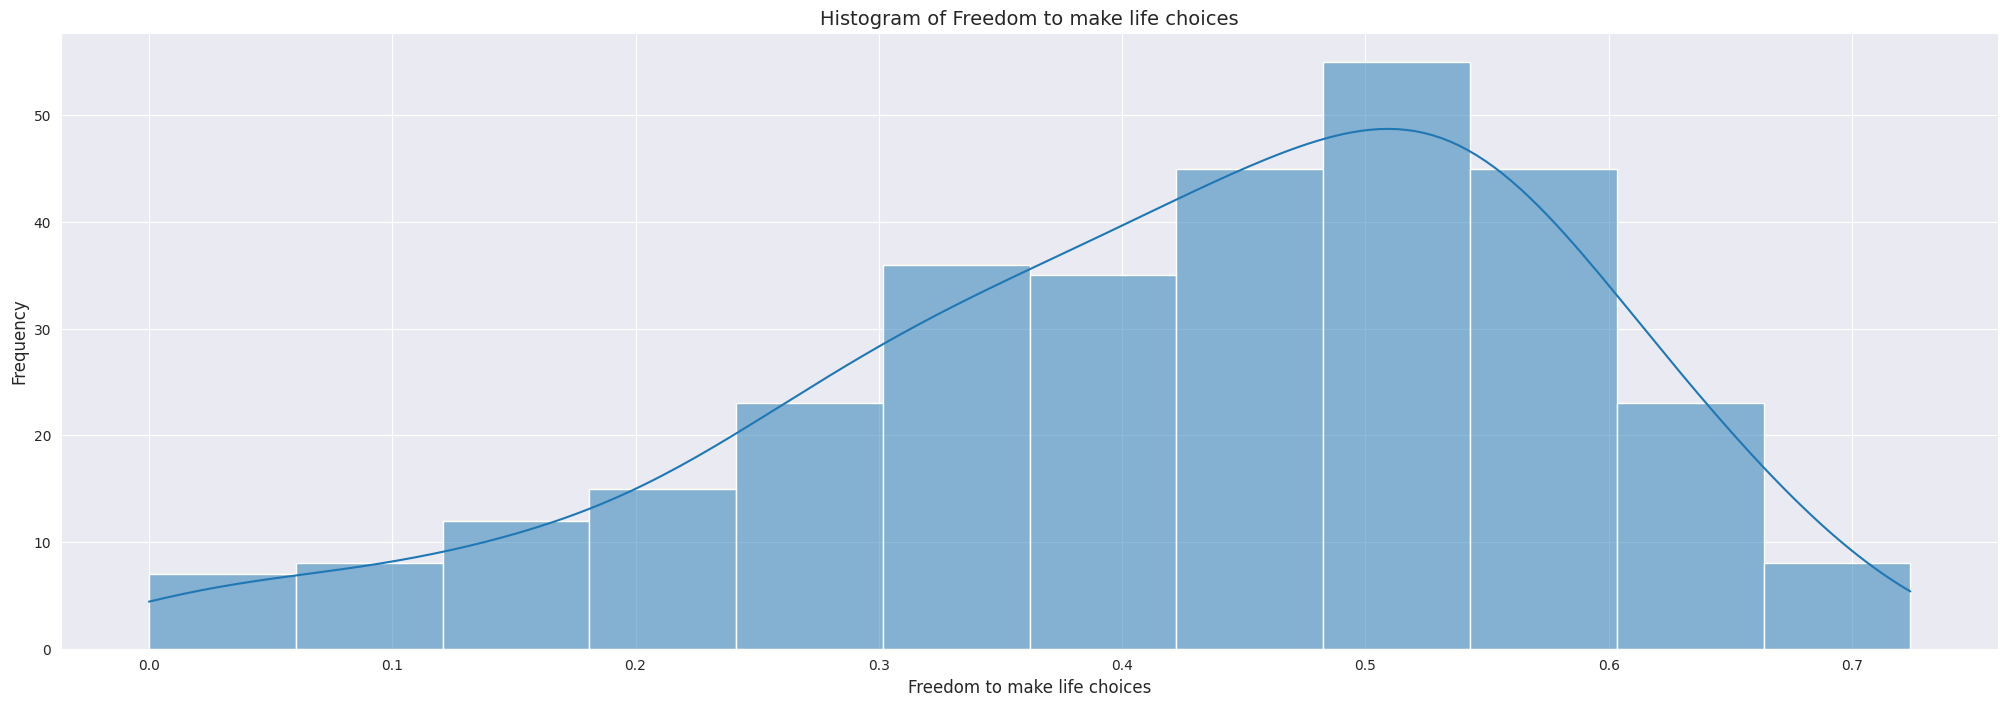

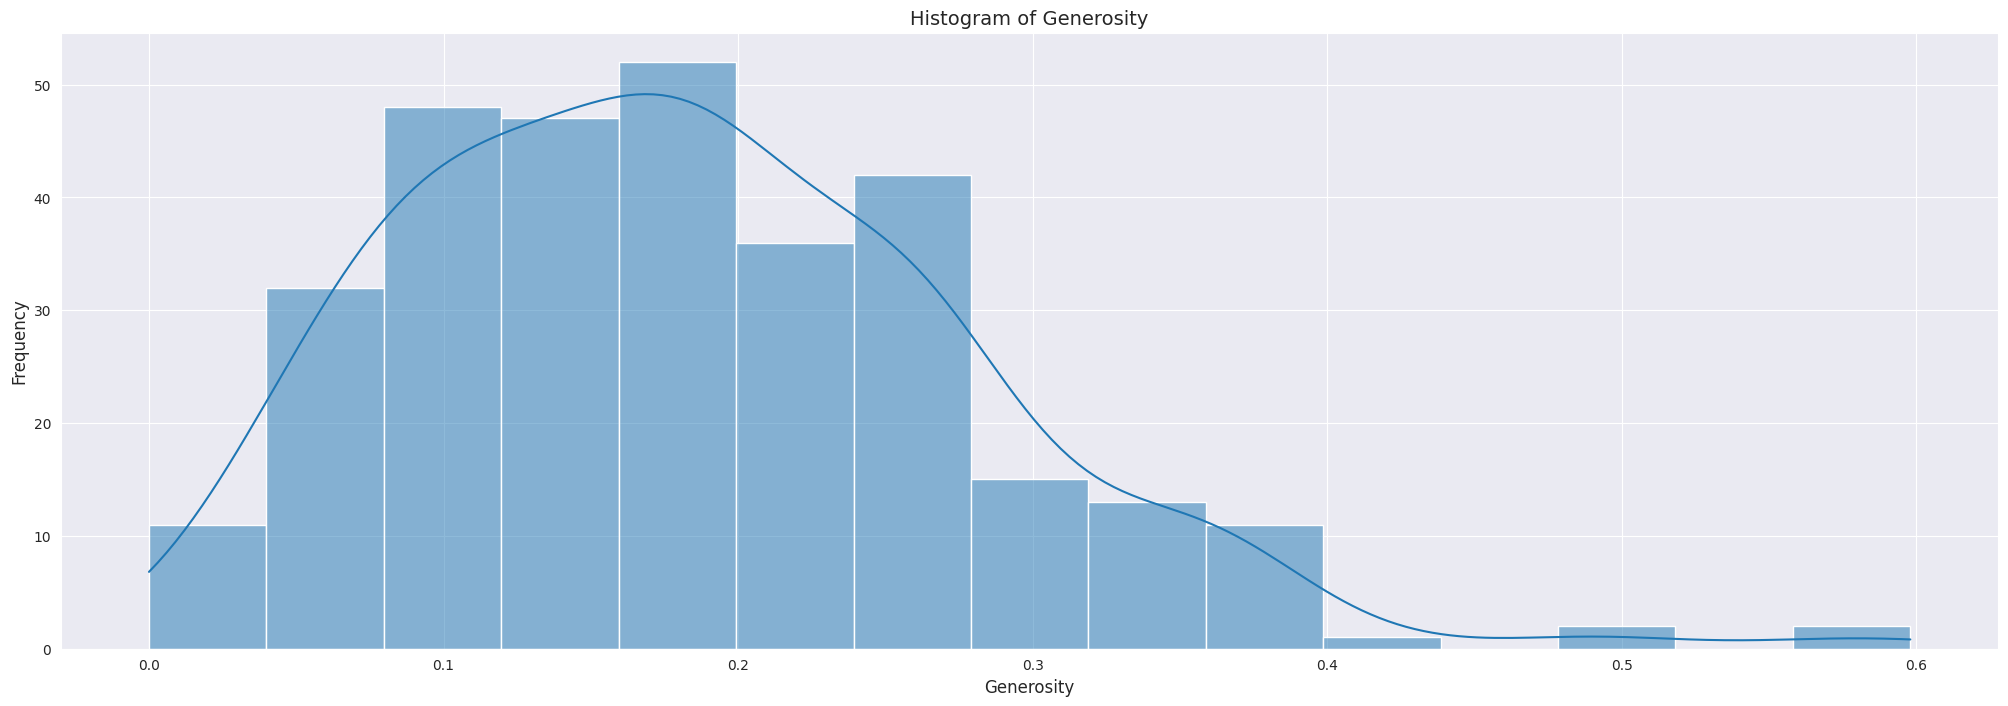

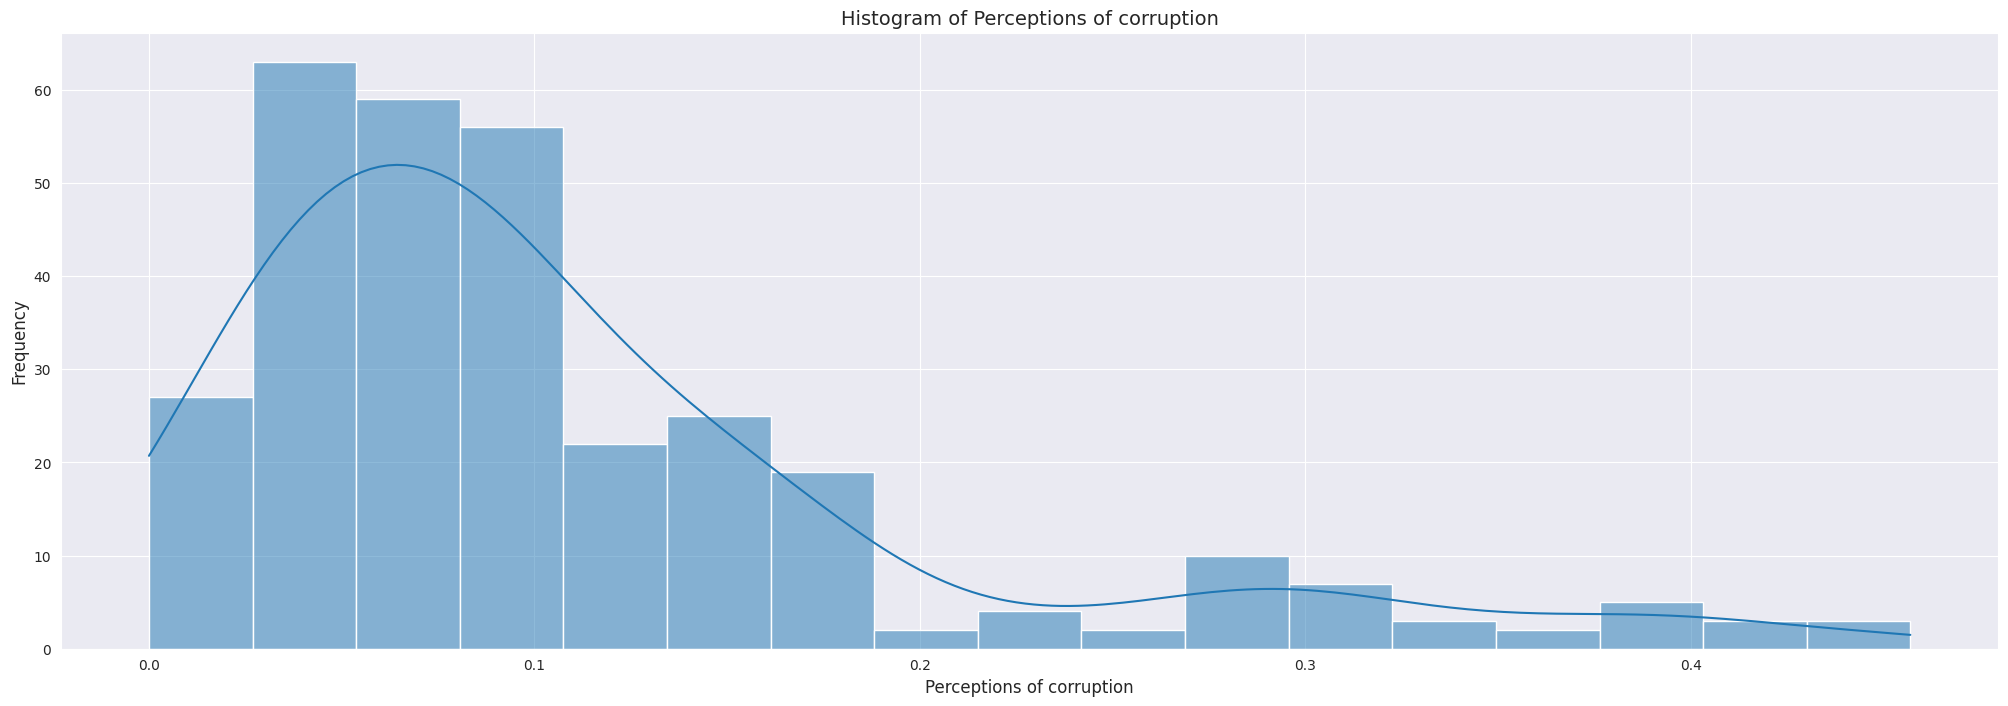

In [ ]:
# create a copy of the dataframe
happiness_df_copy_histogram = happiness_df.copy(deep=True)

# Dropping the 'Overall rank' column
happiness_df_copy_histogram = happiness_df_copy_histogram.drop('Overall rank', axis=1)

numerical_columns = happiness_df_copy_histogram.select_dtypes(include='number').columns
for column in numerical_columns:
    plt.figure(figsize=(25, 8))
    sns.histplot(happiness_df_copy_histogram[column], kde=True)
    plt.title(f'Histogram of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

# Data Pre Processing

# Logistic Regression

In [ ]:
hdf_cc = happiness_df_copy.copy(deep=True)
region_year = ['Country or region','Year']
dummy_var = pd.get_dummies(data=hdf_cc, columns=region_year, drop_first=True)
hdf_cc = hdf_cc.drop(region_year, axis=1)
hdf_cc = pd.concat([hdf_cc, dummy_var], axis=1)
hdf_cc = hdf_cc.loc[:, ~hdf_cc.columns.duplicated()]

In [ ]:
column_drop = ['Score','Overall rank',"Score >= 5.379"]
X = hdf_cc.drop(columns=column_drop,axis=1)
y = hdf_cc['Score >= 5.379']
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X = X_scaled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
predictions = logmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        44
           1       0.90      0.92      0.91        50

    accuracy                           0.90        94
   macro avg       0.90      0.90      0.90        94
weighted avg       0.90      0.90      0.90        94

[[39  5]
 [ 4 46]]


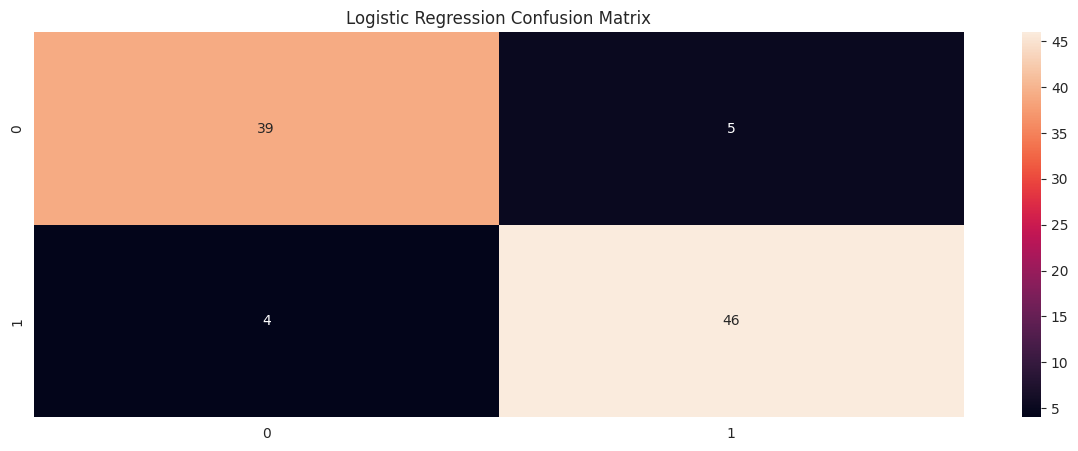

In [ ]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
cf_matrix = confusion_matrix(y_test,predictions)
ax =sns.heatmap(cf_matrix, annot=True)
ax.set_title("Logistic Regression Confusion Matrix")
plt.show()

In [ ]:
scores = cross_val_score(logmodel, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('\nAverage cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.95454545 0.81818182 0.90909091 1.         0.95454545 0.95454545
 0.72727273 0.86363636 0.9047619  0.85714286]

Average cross-validation score: 0.8944


# Linear Regression

In [ ]:
data = happiness_df_copy.copy(deep=True)
data.drop(['Overall rank', 'Year', 'Country or region'], axis=1, inplace=True)

X = data[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = data['Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
features = X_train.columns
# Get the coefficients (feature importance)
coefficients = model.coef_
# Iterate over the coefficients and print the feature importance
for feature, coefficient in zip(features, coefficients):
    print(f"\n{feature}: {coefficient}")




Mean Squared Error: 0.2785038639001442
R^2 Score: 0.7180277588539535

GDP per capita: 1.0746144501514137

Social support: 0.9549825634261677

Healthy life expectancy: 1.0157377342186549

Freedom to make life choices: 1.5343339654333352

Generosity: 0.7559787579121182

Perceptions of corruption: 0.5299866028804406


In [ ]:
scores = cross_val_score(model, X, y, cv=5)

print("Cross-Validation Scores:", scores)

mean_score = scores.mean()
print("Mean Score:", mean_score)

Cross-Validation Scores: [0.73856417 0.75451345 0.8207171  0.61722361 0.76081757]
Mean Score: 0.7383671779796586


# Random Forest

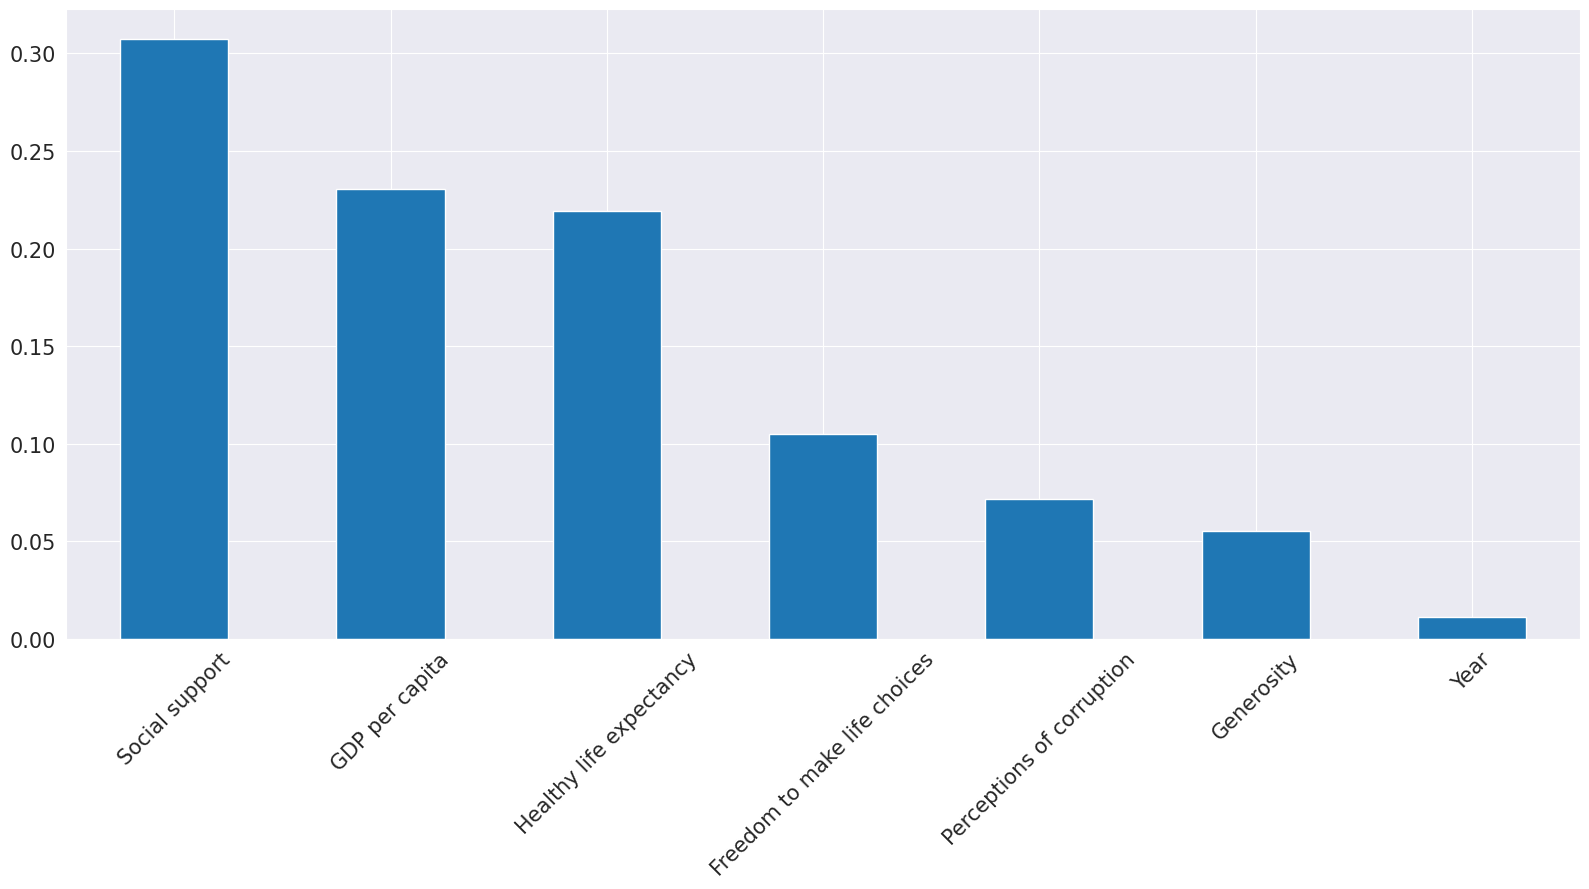

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        44
           1       0.89      0.82      0.85        50

    accuracy                           0.85        94
   macro avg       0.85      0.85      0.85        94
weighted avg       0.85      0.85      0.85        94

[[39  5]
 [ 9 41]]


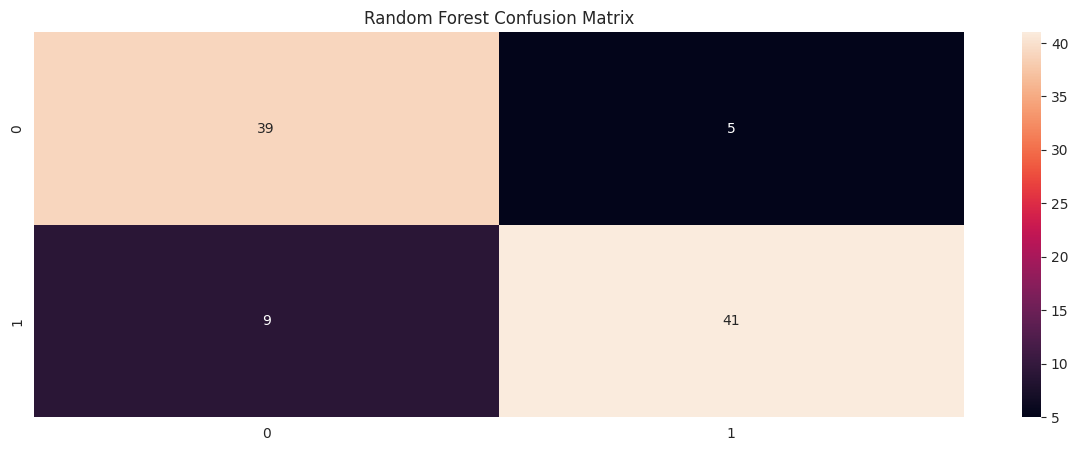

Cross-validation scores:[0.95454545 0.77272727 0.90909091 0.86363636 0.95454545 0.86363636
 0.95454545 0.90909091 0.85714286 0.80952381]

Average cross-validation score: 0.8848


In [ ]:
# Copy the dataframe
happiness_df_rand_forest = happiness_df.copy(deep=True)

# Creating the 'Score >= 5.379' column
happiness_df_rand_forest["Score >= 5.379"] = happiness_df_rand_forest["Score"].apply(lambda x: 1 if x >= 5.379 else 0)

# Defining the feature matrix and target vector
column_drop = ['Score', 'Overall rank', "Score >= 5.379", "Country or region"]
X = happiness_df_rand_forest.drop(columns=column_drop,axis=1)
y = happiness_df_rand_forest['Score >= 5.379']

# Scale the feature matrix
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X = X_scaled

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Define and train the Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, happiness_df_rand_forest.drop(columns=column_drop,axis=1).columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Make the bar Plot from f_importances
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=15)

# Show the plot
plt.tight_layout()
plt.show()

# Generate predictions
predictions = rf_model.predict(X_test)

# Print the classification report and confusion matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix, annot=True)
plt.title("Random Forest Confusion Matrix")
plt.show()

# Perform cross-validation
scores = cross_val_score(rf_model, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('\nAverage cross-validation score: {:.4f}'.format(scores.mean()))

# SVM

In [ ]:
happiness_df.nunique()

Overall rank                    156
Country or region               160
Year                              2
Score                           295
GDP per capita                  276
Social support                  266
Healthy life expectancy         242
Freedom to make life choices    236
Generosity                      198
Perceptions of corruption       174
dtype: int64

In [ ]:
# svm_df = pd.get_dummies(data=happiness_df, columns=['Year', 'Country or region'], drop_first=True)
svm_df = pd.get_dummies(data=happiness_df, columns=['Year'], drop_first=True)
svm_x = svm_df.drop('Score', axis=1)
svm_x.drop('Overall rank', axis=1, inplace=True)
svm_x.drop('Country or region', axis=1, inplace=True)
svm_y = svm_df['Score']

In [ ]:
svm_scaler = StandardScaler()
svm_x_scaled = svm_scaler.fit_transform(svm_x)
svm_x = pd.DataFrame(data=svm_x_scaled, columns = svm_x.columns)

In [ ]:
svm_x.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year_2019
0,-1.391763,-2.314743,-1.190141,-2.718936,-0.258079,-0.909429,1.0
1,-1.437453,-2.248038,-1.610245,-2.173272,0.083593,-0.793813,-1.0
2,0.123622,-1.210778,0.843002,-0.260240,-0.051005,-0.888408,1.0
3,0.044933,-1.314171,0.510090,-0.029135,-0.351262,-0.835855,-1.0
4,0.263230,-0.170183,0.490273,-2.166853,-1.138142,0.026007,1.0


In [ ]:
svm_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GDP per capita                312 non-null    float64
 1   Social support                312 non-null    float64
 2   Healthy life expectancy       312 non-null    float64
 3   Freedom to make life choices  312 non-null    float64
 4   Generosity                    312 non-null    float64
 5   Perceptions of corruption     312 non-null    float64
 6   Year_2019                     312 non-null    float64
dtypes: float64(7)
memory usage: 17.2 KB


In [ ]:
svm_x_train, svm_x_test, svm_y_train, svm_y_test = train_test_split(svm_x, svm_y, test_size = .3, random_state=101)

In [ ]:
svm_model = SVR()
svm_model.fit(svm_x_train, svm_y_train)

SVR()

In [ ]:
svm_predictions = svm_model.predict(svm_x_test)

In [ ]:
svm_r2 = r2_score(svm_y_test, svm_predictions)

In [ ]:
svm_r2

0.819149127636936

In [ ]:
svm_param_grid = {
    'C': [.1, 1, 10, 100, 1000],
    'gamma': [1, .1, .01, .001, .0001],
    'kernel': ['rbf']
}

svm_grid = GridSearchCV(SVR(), svm_param_grid, refit=True, verbose = 3)

In [ ]:
svm_grid.fit(svm_x_train, svm_y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.099 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.149 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.133 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.142 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.185 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.549 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.636 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.747 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.672 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.439 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
svm_grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
svm_model = SVR(C=1.0, gamma=.1, kernel = 'rbf')
svm_model.fit(svm_x_train, svm_y_train)

SVR(gamma=0.1)

In [ ]:
svm_predictions = svm_model.predict(svm_x_test)

In [ ]:
svm_r2 = r2_score(svm_y_test, svm_predictions)

In [ ]:
svm_r2

0.8168967011470152

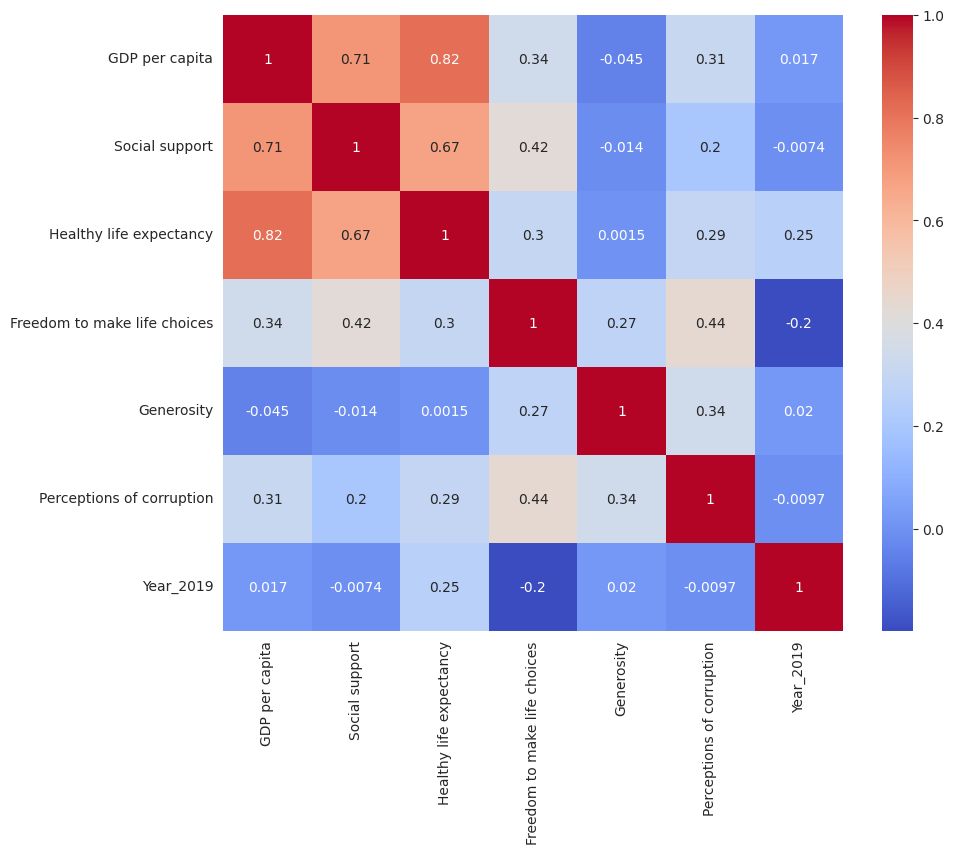

In [ ]:
correlation_matrix = svm_x.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
scores = cross_val_score(svm_model, svm_x_train, svm_y_train, cv=10, scoring='r2')
print('Cross-validation scores:{}'.format(scores))
print('\nAverage cross-validation score: {:.4f}'.format(scores.mean()))

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(svm_y_test, svm_predictions)
mse = mean_squared_error(svm_y_test, svm_predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Cross-validation scores:[0.6670141  0.65534794 0.83243804 0.80184139 0.74082575 0.7260232
 0.86040815 0.85860004 0.82343503 0.71562631]

Average cross-validation score: 0.7682
Mean Absolute Error: 0.3617884761617314
Mean Squared Error: 0.2390557166261796
